In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import math

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import time
import numpy.linalg as nl 


import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as Kr
from tensorflow.keras import initializers

import pandas as pd
import random
import cv2
import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score


from tensorflow import expand_dims
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Lambda
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


from __future__ import print_function
import keras
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import initializers

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 

import time

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist

C:\Users\afmb\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\afmb\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\afmb\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

def adaptive_signQuant_previous(main_vector, dim, nmax,nmin ): #ASiQuaFED
    
    eps = 1
    #nmax = 500
   # nmin = 500
    n_max = np.int64(min(nmax, np.floor(dim/2)))
    n_min = np.int64(min(nmin, np.floor(dim/2)))
    x = main_vector
    x_q = x
    
    # Find the n_max largest values and their indices
    sorted_indices_max = np.argsort(x)
    largest_values_indices = sorted_indices_max[-n_max:]
    largest_values = x[largest_values_indices]
    
    # Find the n_min smallest values and their indices
    sorted_indices_min = np.argsort(x)
    smallest_values_indices = sorted_indices_min[:n_min]
    smallest_values = x[smallest_values_indices]
    
    x_max = np.min(largest_values)
    x_min = np.max(smallest_values)
    
    diff = x_max - x_min
    x_q = eps*np.random.uniform(x_min, x_max, dim)
    
    for i in range(dim):
        x_q[i] = np.sign(x[i]) * np.abs(x_q[i])
    
    for i in range(n_max):
        x_q[largest_values_indices[i]] = x[largest_values_indices[i]]
    
    for i in range(n_min):
        x_q[smallest_values_indices[i]] = x[smallest_values_indices[i]]  
    
    x_quant =  x_q
    err = 0  # main_vector - x_quant
    
    # Return the results
    return x_quant, x_max, x_min


In [3]:
def uniform_quantization(x, b):
    """
    Perform uniform quantization on the non-negative input data x with b bits.

    Parameters:
    x (numpy array): Non-negative input data to be quantized
    b (int): Number of bits for quantization

    Returns:
    numpy array: Quantized data
    """
    R = np.max(np.abs(x))
    # Number of quantization levels
    L = 2 ** b

    # Quantization step size
    delta = R / (L-1)

    # Uniform quantization
    x_clipped = np.clip(x, 0, R)  # Ensure values are within [0, R]
    quantized = np.round(x_clipped / delta) * delta

    return quantized
#-----------------------------------------------------------------------------
#------------------------------------------------------------
def adaptive_signQuant(main_vector, dim, nmax,nmin ): #ASiQuaFED without lambda_j (just with nmax and nmin)
    
    eps = 1
    #nmax = 500
   # nmin = 500
    n_max = np.int64(min(nmax, np.floor(dim/2)))
    n_min = np.int64(min(nmin, np.floor(dim/2)))
    x = main_vector
    x_q = 0*x
    x_quant =  0*x
    # Find the n_max largest values and their indices
    sorted_indices_max = np.argsort(x)
    largest_values_indices = sorted_indices_max[-n_max:]
    largest_values = x[largest_values_indices]
    
    # Find the n_min smallest values and their indices
    sorted_indices_min = np.argsort(x)
    smallest_values_indices = sorted_indices_min[:n_min]
    smallest_values = x[smallest_values_indices]
    
    x_max = np.min(largest_values)
    x_min = np.max(smallest_values)
    
    diff = x_max - x_min
    #x_q = eps*np.random.uniform(x_min, x_max, dim)
    negative_indices = x < 0
    positive_indices = x > 0

    x_q[negative_indices] = x_min / 2
# eps * np.random.uniform(x_min, 0, np.sum(negative_indices))
    x_q[positive_indices] =  x_max / 2
#eps * np.random.uniform(0, x_max, np.sum(positive_indices))
    #for i in range(dim):
    #    #x_q[i] = np.sign(x[i]) * np.abs(x_q[i])
    #    if np.sign(x[i]) <0:
   #         x_q[i] = eps*np.random.uniform(x_min, 0)
    #    if np.sign(x[i])>0:
    #        x_q[i] = eps*np.random.uniform(0, x_max)
            
    for i in range(n_max):
        x_q[largest_values_indices[i]] = x[largest_values_indices[i]]
    
    for i in range(n_min):
        x_q[smallest_values_indices[i]] = x[smallest_values_indices[i]]  
    
    x_quant =  x_q
    err =  main_vector - x_quant
    
    # Return the results
    return x_q, x_max, x_min, err, n_max, n_min 


In [4]:
def adaptive_Quant_EFLAQ(main_vector, dim, x):
    
    
    #x = np.max(abs(main_vector))
    #sign_x = int(np.sign(x))
    # dim = main_vector.shape[0]
    p10 = int(np.floor(np.log10(abs(x)))) 
    x_q = np.round(main_vector/(10**(p10)))
    b_q = np.zeros([dim,1])
    err = main_vector - (10**(p10))*x_q
    
    for i in range(dim):
        s = np.zeros([1,2])
        s = math.frexp(x_q[i][0])
        #if s[1]==0:  # if a number is zero, we do not consider the sign, jus consider one bit for 0, as in b_q[i] = 1 + 0
        #    s[1] = 1
        if np.abs(x_q[i][0]) <= 0.01:
            x_q[i][0] = 0.001 #* np.abs(main_vector[i][0])/main_vector[i][0]
            
        
            
        b_q[i] = 1 + np.int64(s[1])
        
    s_p = math.frexp(abs(p10))
    b_p = np.int64(s_p[1])
    
    
   # if s_p[1]==0:
   #     b_p = 1
    x_quant = (10**(p10))*x_q
    return x_quant, np.sum(b_q), np.max(abs(err)), b_p, p10
    #return x_quant, b_q, err, b_p, p10    

In [26]:
import numpy as np

def uniform_quantization(x, b):
    """
    Perform uniform quantization on the non-negative input data x with b bits.

    Parameters:
    x (numpy array): Non-negative input data to be quantized
    b (int): Number of bits for quantization

    Returns:
    numpy array: Quantized data
    """
    
    x_max = np.max(np.abs(x))
    x_min = np.min(np.abs(x))
    R = x_max - x_min
    # Number of quantization levels
    L = 2 ** b

    # Quantization step size
    delta = R / (L-1)

    x_clipped = np.clip(x, x_min, x_max)  # Ensure values are within [x_min, x_max]
    quantized = np.round((x_clipped - x_min) / delta) * delta + x_min

    return quantized
#-----------------------------------------------------------------------------
def adaptive_signQuant_lambda(main_vector, dim, lambda_j, b_j):
    mynum = 0
    l_norm = np.linalg.norm(main_vector, ord=np.inf)
    
    # Normalize each element of the vector 
    normalized_x = np.abs(main_vector) / l_norm

    # Identify the indices where the normalized value is greater than or equal to lambda
    indices = np.where(normalized_x >= lambda_j)[0]
    non_indices = np.where(normalized_x < lambda_j)[0]

    # Count the number of positive and negative elements among these indices
    positive_elements = main_vector[indices] > 0
    negative_elements = main_vector[indices] < 0

    n_max = np.sum(positive_elements)
    n_min = np.sum(negative_elements)

    x = np.copy(main_vector)
    x_q = mynum*np.ones_like(x)#*np.sign(x)
    x_q_temp = np.zeros_like(x)

    # Quantize values where normalized_x >= lambda_j
    for i in indices:
        x_q_temp[i] = np.abs(x[i])
    x_q0 = uniform_quantization(x_q_temp, b_j)
    for i in indices:
        x_q[i] = np.sign(x[i]) * x_q0[i]

    if n_max > 0:
        largest_values_indices = np.argsort(x_q)[-n_max:]
        largest_values = x_q[largest_values_indices]
    else:
        largest_values_indices = np.array([], dtype=int)
        largest_values = np.array([], dtype=x_q.dtype)

    # Find the n_min smallest values and their indices
    if n_min > 0:
        smallest_values_indices = np.argsort(x_q)[:n_min]
        smallest_values = x_q[smallest_values_indices]
    else:
        smallest_values_indices = np.array([], dtype=int)
        smallest_values = np.array([], dtype=x_q.dtype)

    if largest_values.size > 0:
        x_max = np.min(largest_values)
    else:
        x_max = 0

    if smallest_values.size > 0:
        x_min = np.max(smallest_values)
    else:
        x_min = 0
    
    if np.abs(x_min) > 0 and x_max > 0:
        x_min_me = min(x_max, np.abs(x_min))
    else:
        x_min_me = max(x_max,0, np.abs(x_min))
    
    if x_min_me < 1e-10:
        x_min_me =  0.0001
    
    for i in range(len(main_vector)):
        if x_q[i] ==mynum:
            x_q[i] = (np.sign(x[i]) == 1)*x_min_me/2 - (np.sign(x[i]) == -1)*x_min_me/2
    
    x_quant = x_q
    err = main_vector - x_quant
    
    # Return the results
    return x_q, x_max, x_min, err, n_max, n_min, x_min_me 



In [27]:
import numpy as np

data = np.array([
    [0.94264682],
    [0.93704575],
    [0.63369663],
    [0.73097748],
    [0.26231286],
    [0.99673715],
    [0.28163076],
    [0.93845916],
    [0.9594422],
    [0.001],
    [0.37931672],
    [0.3295134],
    [0.31043754],
    [0.21553185],
    [0.48937652],
    [0.44119179],
    [0.99869733],
    [0.14338923],
    [0.0778739],
    [0.97500858]
])

print(data)


[[0.94264682]
 [0.93704575]
 [0.63369663]
 [0.73097748]
 [0.26231286]
 [0.99673715]
 [0.28163076]
 [0.93845916]
 [0.9594422 ]
 [0.001     ]
 [0.37931672]
 [0.3295134 ]
 [0.31043754]
 [0.21553185]
 [0.48937652]
 [0.44119179]
 [0.99869733]
 [0.14338923]
 [0.0778739 ]
 [0.97500858]]


# FL with Quntization and AdaGrad

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data


In [28]:
# Define neural network architecture

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model
# Define the number of clients and local epochs
num_clients= 20
#local_epochs = 1
local_epochs0 = 3 #local_epochs FedAvg
local_epochs = 3
epoch_increase = 0
b_j = 10
# Federated Averaging algorithm
num_global_iterations = 10
k_0 = -100 #num_global_iterations +1

#learning_rate = 1e-3
#optimizer = SGD(learning_rate=learning_rate)
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1)

#optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4) #


# Split the data into non-overlapping portions for each client
client_data = []
samples_per_client = len(x_train) // num_clients
for i in range(num_clients):
    start = i * samples_per_client
    end = (i + 1) * samples_per_client
    x_client = x_train[start:end]
    y_client = y_train[start:end]
    client_data.append((x_client, y_client))

    
    
Lambda0 = np.random.rand(num_clients)
Lambda0 = np.abs(np.random.randn(num_clients))
LAmbda = np.zeros(num_clients)

for i in range(num_clients):
    LAmbda[i] = (1 - Lambda0[i]/np.max(Lambda0) + 0.001)
Lambda = 10*LAmbda/np.sum(LAmbda)
Lambda = 0.1*np.ones(num_clients)
print('Lambda:', Lambda)
##print('sum lambda:', np.sum(Lambda))
# Initialize the global model
global_model = create_model()


# Compile the global model
global_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#global_model_FedAvg = global_model 
global_model_FedAvg = create_model()
global_model_FedAvg.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
global_weights = global_model.get_weights()
B_q = np.zeros([8,num_global_iterations])

#------------- FedAvg benchmark----------------------


global_model_FedAvg.set_weights(global_weights)
global_acc_list = []
global_loss_list = []

global_acc_list_FedAvg = []
global_loss_list_FedAvg = []

#----------- Initial values:
initial_loss, initial_accuracy = global_model.evaluate(x_test, y_test)
print(f'Initial Test Loss: {initial_loss:.4f}')
print(f'Initial Test Accuracy: {initial_accuracy:.4f}')

global_acc_list_FedAvg.append(initial_accuracy)
global_acc_list.append(initial_accuracy)

Lambda: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1]
313/313 [==============================] - 4s 11ms/step - loss: 2.3502 - accuracy: 0.1009
Initial Test Loss: 2.3474
Initial Test Accuracy: 0.0969


Global Iteration 1/10
Client 1/20


C:\Users\afmb\AppData\Local\Temp\ipykernel_8084\3445629502.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights)


max: 0.5786716341972351 ----min: -0.24869945645332336
n_max: 216 n_min: 285 Lambda_j: 0.1
max error: 0.02901081121431068
max_model: 0.05769746499327271 min_model: -0.058263126414775386 x_min_me: 0.05769746499327271
percentage %: 0.1083454077550226
Client 2/20


C:\Users\afmb\AppData\Local\Temp\ipykernel_8084\3445629502.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))


max: 0.49857157468795776 ----min: -0.321997731924057
n_max: 528 n_min: 745 Lambda_j: 0.1
max error: 0.024976709469759568
max_model: 0.04971094879586676 min_model: -0.04971094879586676 x_min_me: 0.04971094879586676
percentage %: 0.275296814515257
Client 3/20
max: 0.595399796962738 ----min: -0.2850421667098999
n_max: 222 n_min: 408 Lambda_j: 0.1
max error: 0.029973694335674744
max_model: 0.059947389137010774 min_model: -0.059947389137010774 x_min_me: 0.059947389137010774
percentage %: 0.13624272831469908
Client 4/20
max: 0.5963666439056396 ----min: -0.3424251079559326
n_max: 509 n_min: 358 Lambda_j: 0.1
max error: 0.02989556421894482
max_model: 0.059461776811706 min_model: -0.059461776811706 x_min_me: 0.059461776811706
percentage %: 0.18749594515689538
Client 5/20
max: 0.4809700548648834 ----min: -0.3047997057437897
n_max: 551 n_min: 536 Lambda_j: 0.1
max error: 0.024114952234229037
max_model: 0.047955958549577814 min_model: -0.04842611500594623 x_min_me: 0.047955958549577814
percentage 

max: 0.4235202372074127 ----min: -0.42844080924987793
n_max: 1904 n_min: 2002 Lambda_j: 0.1
max error: 0.02148367556309071
max_model: 0.042718438458932105 min_model: -0.042718438458932105 x_min_me: 0.042718438458932105
percentage %: 0.8447049155511342
Client 12/20
max: 0.46167755126953125 ----min: -0.2900383770465851
n_max: 1782 n_min: 985 Lambda_j: 0.1
max error: 0.023148001900865883
max_model: 0.04603236581573039 min_model: -0.04603236581573039 x_min_me: 0.04603236581573039
percentage %: 0.5983867130901148
Client 13/20
max: 0.3922187387943268 ----min: -0.30376309156417847
n_max: 2438 n_min: 1611 Lambda_j: 0.1
max error: 0.019664365590667445
max_model: 0.039106853721428476 min_model: -0.039106853721428476 x_min_me: 0.039106853721428476
percentage %: 0.8756298522955819
Client 14/20
max: 0.4144831895828247 ----min: -0.34142446517944336
n_max: 2278 n_min: 1113 Lambda_j: 0.1
max error: 0.02077518356554319
max_model: 0.04132676963582417 min_model: -0.04132676963582417 x_min_me: 0.041326769

max: 0.2472279667854309 ----min: -0.22088617086410522
n_max: 8951 n_min: 8055 Lambda_j: 0.1
max error: 0.012396888070005127
max_model: 0.024650295808518036 min_model: -0.024650295808518036 x_min_me: 0.024650295808518036
percentage %: 3.6776886313012263
------------------------------------------------------------------------------------------------------
N_total: 245855
313/313 [==============================] - 3s 8ms/step - loss: 1.4711 - accuracy: 0.4738
Global Test loss: 1.4711, Global Test accuracy: 0.4738
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 6ms/step - loss: 1.5465 - accuracy: 0.4496
_FedAvg Global Test loss: 1.5465, _FedAvg Global Test accuracy: 0.4496
------------------------------------------------------------------------------------------------------
Global Iteration 4/10
Client 1/20
max: 0.257080614566803 ----min: -0.19446121156215668
n_max: 10424 n_min: 10306 Lambda

n_max: 16002 n_min: 15932 Lambda_j: 0.1
max error: 0.010023059088551054
max_model: 0.019929770850016574 min_model: -0.019929770850016574 x_min_me: 0.019929770850016574
percentage %: 6.905992517462858
Client 7/20
max: 0.20424053072929382 ----min: -0.22702962160110474
n_max: 14619 n_min: 12743 Lambda_j: 0.1
max error: 0.011383711898431749
max_model: 0.022636384558467924 min_model: -0.022636384558467924 x_min_me: 0.022636384558467924
percentage %: 5.9172595748361845
Client 8/20
max: 0.18439945578575134 ----min: -0.23448783159255981
n_max: 13768 n_min: 12486 Lambda_j: 0.1
max error: 0.01175833512042974
max_model: 0.023380018399258164 min_model: -0.023380018399258164 x_min_me: 0.023380018399258164
percentage %: 5.677645379641444
Client 9/20
max: 0.2058866024017334 ----min: -0.19286349415779114
n_max: 16200 n_min: 16598 Lambda_j: 0.1
max error: 0.010323662327225607
max_model: 0.020528282937416233 min_model: -0.020528282937416233 x_min_me: 0.020528282937416233
percentage %: 7.092839687723016


max: 0.4283626675605774 ----min: -0.19829218089580536
n_max: 4324 n_min: 7256 Lambda_j: 0.1
max error: 0.021478935966918196
max_model: 0.042710647205453464 min_model: -0.042710647205453464 x_min_me: 0.042710647205453464
percentage %: 2.5042711014035164
Client 16/20
max: 0.2444610893726349 ----min: -0.23237380385398865
n_max: 13080 n_min: 14692 Lambda_j: 0.1
max error: 0.012258651843868044
max_model: 0.024374419468239254 min_model: -0.024374419468239254 x_min_me: 0.024374419468239254
percentage %: 6.0059254773901944
Client 17/20
max: 0.20941483974456787 ----min: -0.1866741180419922
n_max: 16730 n_min: 15499 Lambda_j: 0.1
max error: 0.010500983059231486
max_model: 0.020880071997992106 min_model: -0.020880071997992106 x_min_me: 0.020880071997992106
percentage %: 6.969788715641963
Client 18/20
max: 0.21812628209590912 ----min: -0.2491002380847931
n_max: 12809 n_min: 13333 Lambda_j: 0.1
max error: 0.012491448948984622
max_model: 0.024836973885287286 min_model: -0.024836973885287286 x_min_me

max: 0.20569700002670288 ----min: -0.25617891550064087
n_max: 14762 n_min: 13074 Lambda_j: 0.1
max error: 0.012845980047174565
max_model: 0.02554276576839234 min_model: -0.02554276576839234 x_min_me: 0.02554276576839234
percentage %: 6.019766008520577
Client 2/20
max: 0.20454740524291992 ----min: -0.20712460577487946
n_max: 19479 n_min: 18654 Lambda_j: 0.1
max error: 0.010386394456990303
max_model: 0.020651720223888274 min_model: -0.020651720223888274 x_min_me: 0.020651720223888274
percentage %: 8.246577712419715
Client 3/20
max: 0.17449796199798584 ----min: -0.21176186203956604
n_max: 18586 n_min: 15710 Lambda_j: 0.1
max error: 0.01061877181693431
max_model: 0.021114085951159076 min_model: -0.021114085951159076 x_min_me: 0.021114085951159076
percentage %: 7.4167946194935235
Client 4/20
max: 0.20728029310703278 ----min: -0.23445554077625275
n_max: 16173 n_min: 16090 Lambda_j: 0.1
max error: 0.011756133954545969
max_model: 0.023376798787075055 min_model: -0.023376798787075055 x_min_me: 

max: 0.1588301658630371 ----min: -0.20925551652908325
n_max: 19598 n_min: 18668 Lambda_j: 0.1
max error: 0.01049278417596719
max_model: 0.020864186398794227 min_model: -0.020864186398794227 x_min_me: 0.020864186398794227
percentage %: 8.275340066175039
Client 11/20
max: 0.23966532945632935 ----min: -0.23791629076004028
n_max: 15593 n_min: 22229 Lambda_j: 0.1
max error: 0.012017990039153532
max_model: 0.02389624985781583 min_model: -0.02389624985781583 x_min_me: 0.02389624985781583
percentage %: 8.179321381458013
Client 12/20
max: 0.17365747690200806 ----min: -0.18892571330070496
n_max: 20894 n_min: 23985 Lambda_j: 0.1
max error: 0.00947381788181944
max_model: 0.018837167895084952 min_model: -0.018837167895084952 x_min_me: 0.018837167895084952
percentage %: 9.705456196881554
Client 13/20
max: 0.20590509474277496 ----min: -0.18710625171661377
n_max: 22070 n_min: 25727 Lambda_j: 0.1
max error: 0.010325404004223885
max_model: 0.020530126748546478 min_model: -0.020530126748546478 x_min_me: 

max: 0.2329646646976471 ----min: -0.18055486679077148
n_max: 16846 n_min: 16129 Lambda_j: 0.1
max error: 0.011681641258102709
max_model: 0.02322814838627566 min_model: -0.02322814838627566 x_min_me: 0.02322814838627566
percentage %: 7.131117406630479
Client 20/20
max: 0.19544440507888794 ----min: -0.22398799657821655
n_max: 18722 n_min: 16556 Lambda_j: 0.1
max error: 0.011231590717856135
max_model: 0.02233311402832658 min_model: -0.02233311402832658 x_min_me: 0.02233311402832658
percentage %: 7.6291602690253235
------------------------------------------------------------------------------------------------------
N_total: 780955
313/313 [==============================] - 2s 6ms/step - loss: 1.3185 - accuracy: 0.5654
Global Test loss: 1.3185, Global Test accuracy: 0.5654
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 6ms/step - loss: 1.4036 - accuracy: 0.5532
_FedAvg Global Test loss: 1.4

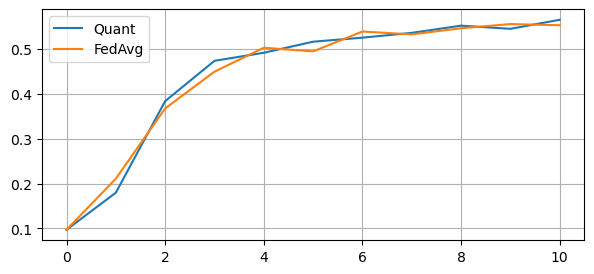

In [29]:
Bits = np.zeros([num_clients, num_global_iterations])
percentage = np.zeros([num_clients, num_global_iterations])
#-----------------------------------------------------
t_start=time.time()
for k in range(num_global_iterations):
    N_total = 0
    
    print(f"Global Iteration {k + 1}/{num_global_iterations}")

    # List to store client models for averaging
    client_models = []
    client_models_FedAvg = []

    for i in range(num_clients):
        print(f"Client {i + 1}/{num_clients}")
        x_local, y_local = client_data[i]

        # Create a copy of the global model for each client
        local_model = create_model()
        local_model.set_weights(global_weights)#global_model.get_weights())
        #----------------------- FedAvg benchmark--------------------------------
        local_model_FedAvg = create_model()
        local_model_FedAvg.set_weights(global_model_FedAvg.get_weights())
        local_model_FedAvg .compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        local_model_FedAvg .fit(x_local, y_local, epochs=local_epochs0, verbose=0)
        
            
        #----------------------------------------------------
        # Compile and train the local model
        local_model.compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        
        local_model.fit(x_local, y_local, epochs=local_epochs , verbose=0)

        if k<= k_0:
            local_model.set_weights(local_model_FedAvg.get_weights())
#--------------------------------------------------- Quantization -----------------------------------------
        if k>k_0:
        # Quantize the local model weights
        #quantized_weights = [np.round(w * 127) / 127 for w in local_model.get_weights()]
            diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights) 
            local_weight_shape_0 = diff_local_global_weight.shape[0]
            quantized_diff_local_global_weight = diff_local_global_weight
            err = np.zeros([local_weight_shape_0 ,1])
            b_p = np.zeros([local_weight_shape_0 ,1])
            b_q =  np.zeros([local_weight_shape_0 ,1])
            x_previous = np.zeros([local_weight_shape_0 ,1])
            x_all_original = np.zeros([local_weight_shape_0 ,1])
            p10 = 0
            x_all = 0
            x = np.zeros([local_weight_shape_0,1])
            Quantized_diff_local_global_weight = []
            for h in range(local_weight_shape_0):
                x_position = 0
                if h==0:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(27*32,)
                    #Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
               ## quantized_diff_local_global_weight[h], tau, err[h], r = Quantization_NNs(bits,R,diff_local_global_weight[h])
                if h==2:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(7200*64,)
                
                if h in (1, 3, 5):
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(quantized_diff_local_global_weight[h].shape[0],)
                
                #if h==6:
                   # quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,1)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10*64,)
                
               #### x_previous[h] = np.max(abs(quantized_diff_local_global_weight[h]))
                ####x_position = np.where(np.abs(quantized_diff_local_global_weight[h]) == 
                ####                      max(np.abs(quantized_diff_local_global_weight[h])))
                ####x_temp=quantized_diff_local_global_weight[h] 
                ####x_all_original[h] = x_temp[x_position[0][0]] 
                #print(x[b[0][0]])
            
            #print(x_previous.T)
            ####x_all = np.max(x_previous)
           #### x_position_all = np.where(np.abs(x_previous) == max(np.abs(x_previous)))
            ####x_all_original1 = x_all_original[x_position_all[0][0]]
           #### print('x_all_original1:', x_all_original1)
            
           #### #print(x_previous.T)
            ####x_all = np.max(x_previous)
            #print('x_all:', x_all)
            
            for h in range(local_weight_shape_0):
                Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
           
            
            Quantized_diff_local_global_weight_for_me = Quantized_diff_local_global_weight
            print('max:',np.max(Quantized_diff_local_global_weight), '----min:',np.min(Quantized_diff_local_global_weight))
           
        # print('min:',np.min(Quantized_diff_local_global_weight))
        
            #nmax = 10000#min(2000*(2+k), 50000)
            #nmin = nmax
           # print( 'min of absolute value:',np.min(np.abs(Quantized_diff_local_global_weight)))
            #Quantized_diff_local_global_weight, max_model, min_model, err = adaptive_signQuant(Quantized_diff_local_global_weight, Quantized_diff_local_global_weight.shape[0], nmax,nmin)
            
            Quantized_diff_local_global_weight, max_model, min_model, err, n_max, n_min, x_min_me = adaptive_signQuant_lambda(Quantized_diff_local_global_weight, 
                                                                                                       Quantized_diff_local_global_weight.shape[0], Lambda[i], b_j)
            
            print('n_max:', n_max, 'n_min:', n_min, 'Lambda_j:', Lambda[i])
            N_total += n_max + n_min
            Bits[i,k] = (462410 - n_max - n_min) + (b_j+1)*(n_max + n_min)
            Quantized_diff_local_global_weight1 = Quantized_diff_local_global_weight
           
            print('max error:', np.max(np.abs(err)))# - np.sum(Quantized_diff_local_global_weight1))
            #print('sum 1r:', np.sum(Quantized_diff_local_global_weight1))
            #print('max_model:', max_model)
            #print('min_model:', min_model)
            print('max_model:', 1*max_model, 'min_model:', 1*min_model, 'x_min_me:', x_min_me)
            percentage[i,k] = 100*(n_min+n_max)/462410
            print('percentage %:', percentage[i,k] )
            #------------------ Update the local model with quantized weights:-----------------------------
            dim_h = 0
            for h in range(local_weight_shape_0):
                if h==0:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[0:27*32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(3, 3, 3, 32)
                    dim_h += 27*32
                    
                    
                if h==1:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,)
                    dim_h += 32
                if h==2: 
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+7200*64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(7200, 64)
                    dim_h+= 7200*64
                if h==3:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,)
                    dim_h += 64
            
                #if h==6:
                 #   quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+640]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    dim_h += 640
              
                if h==5:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+10]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10,)
                    dim_h += 10
            
            
            local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))
        #else:
           # local_model.set_weights()
            
        # Add the trained and quantized local model to the list
        client_models.append(local_model)
        client_models_FedAvg.append(local_model_FedAvg)
        #B_q[:,k] += b_q
            
        #---------------------------FedAvg benchmark---------------------------------
    #print('nmax:', nmax)
    global_weights_FedAvg = np.mean([model0.get_weights() for model0 in client_models_FedAvg], axis=0)
    global_model_FedAvg.set_weights(global_weights_FedAvg)

#------------------------------------------------------------------------------------------------------------
    # Calculate the global model's new weights as the average of the client models
    if k <= k_0:
        global_model.set_weights(global_weights_FedAvg)
        global_weights = global_weights_FedAvg
    else:
        global_weights = np.mean([model.get_weights() for model in client_models], axis=0)
        global_model.set_weights(global_weights)
        #local_epochs = min(12, local_epochs + epoch_increase)
        #local_epochs += epoch_increase
        #local_epochs0 = local_epochs
        #local_epochs = max(1, local_epochs)
    
    if k == k_0:
        local_epochs += epoch_increase
        local_epochs0 = local_epochs
   # B_q[:,k] = b_q
#----------------------------------------------------------------------------
    # Evaluate the global model on the test data
    print('------------------------------------------------------------------------------------------------------')
    print('N_total:', N_total)
    loss, accuracy = global_model.evaluate(x_test, y_test)
    print(f"Global Test loss: {loss:.4f}, Global Test accuracy: {accuracy:.4f}")
    
    global_acc_list.append(accuracy)
    global_loss_list.append(loss)
   # print('Lambda:',Lambda)
# The final global model is stored in 'global_model'
#-------------------------------------Evaluate the FedAvg global model on the test data----------------------
    print('------------------------------ ------FedAvg Benchmark------------------------------------------------')
    loss_FedAvg, accuracy_FedAvg = global_model_FedAvg.evaluate(x_test, y_test)
    print(f"_FedAvg Global Test loss: {loss_FedAvg:.4f}, _FedAvg Global Test accuracy: {accuracy_FedAvg:.4f}")
    print('------------------------------------------------------------------------------------------------------')
    global_acc_list_FedAvg.append(accuracy_FedAvg)
    global_loss_list_FedAvg.append(loss_FedAvg)
    #----------------
   # plt.figure(figsize=(7, 3))
   # plt.plot(global_acc_list)    
   # plt.plot(global_acc_list_FedAvg)
   # plt.legend(['Quant', 'FedAvg'])
   # plt.grid(True, which='major')   
    
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list )    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    
t_stop=time.time()            
print('simulation time:', t_stop- t_start)            
            
            

5.0794143725265455
1.5080106399083064
simulation time: 3608.11079287529


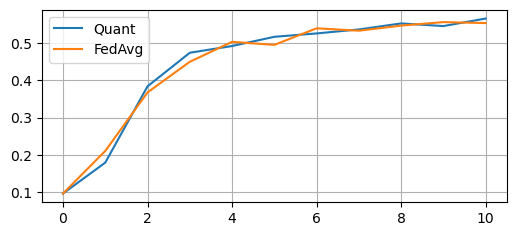

In [30]:
# Lambda = 0.1, K 20, L3, b10
print(np.mean(percentage))
print(np.mean((32+Bits)/462410))

plt.figure(figsize=(6, 2.5))
plt.plot(global_acc_list )    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    
t_stop=time.time()            
print('simulation time:', t_stop- t_start)      

5.359445081204992
1.1072581042797518
simulation time: 3721.142324447632


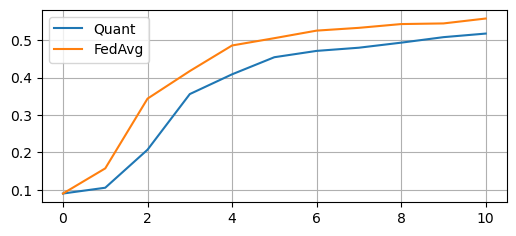

In [25]:
# Lambda = 0.1, K 20, L3, b2
print(np.mean(percentage))
print(np.mean((32+Bits)/462410))

plt.figure(figsize=(6, 2.5))
plt.plot(global_acc_list )    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    
t_stop=time.time()            
print('simulation time:', t_stop- t_start)            
            

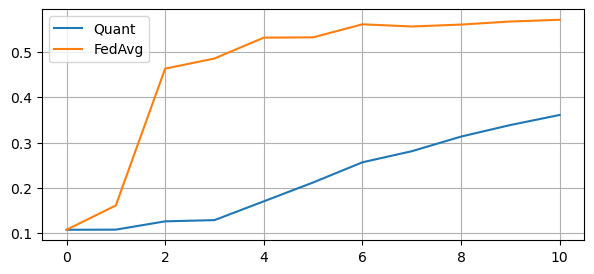

In [22]:
#K=20, b_j=6, with 0 elements for low-resolutions
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')   

In [ ]:
acc_q = np.array(global_acc_list)
acc_fed = np.array(global_acc_list_FedAvg)

# Base directory where you want to save the results
base_dir = 'C:/FedASi files'

# Prompt the user to input the folder name
#run_folder_name = input("Enter the folder name for this run: ")
run_folder_name = 'deltaw_FedAvg'
run_folder_path = os.path.join(base_dir, run_folder_name)

# Create the directory if it doesn't exist
os.makedirs(run_folder_path, exist_ok=True)

# List of matrices to save and their respective filenames
matrices = {
    'deltaw': 
    
    # Add more matrices here as needed
}

# Save each matrix to a .npy file in the specified folder
for name, matrix in matrices.items():
    file_name = os.path.join(run_folder_path, f'{name}.npy')
    np.save(file_name, matrix)
    print(f'{name} saved to {file_name}')


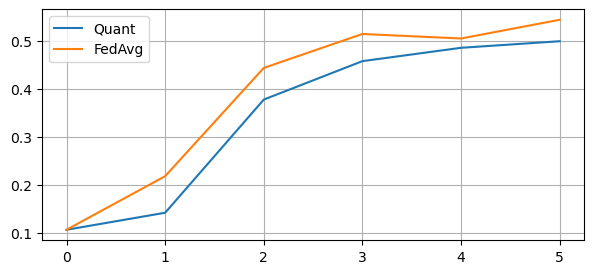

In [10]:
#K=20, b_j=2, with 0 elements for low-resolutions
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    

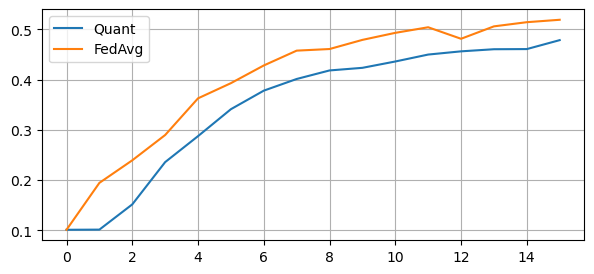

In [45]:
#K=20, b_j=2, with 0 elements for low-resolutions
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    

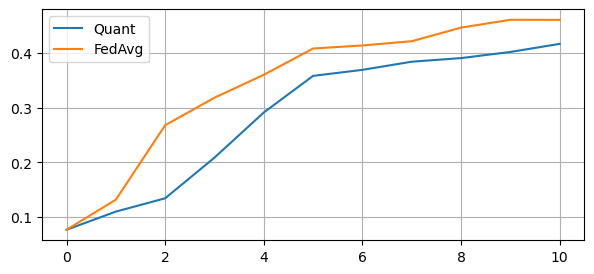

In [39]:
#K=20, b_j=2, with 0.0001 elements for low-resolutions
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    

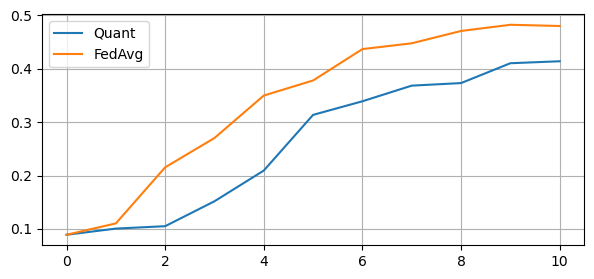

In [27]:
#K=20, b_j=2, with 0 elements obtained in the code for low-resolutions
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    

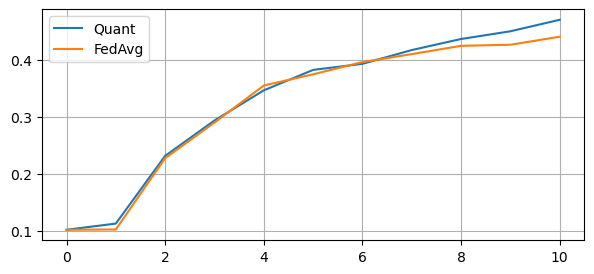

In [24]:
#K=20, b_j=5
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    

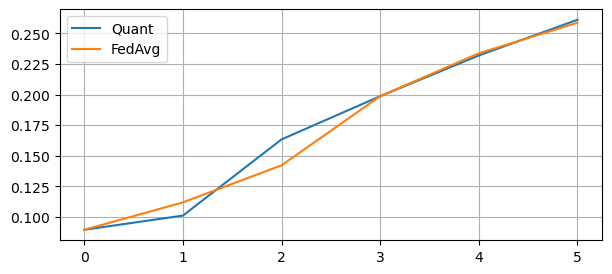

In [115]:
#clients = 100
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')

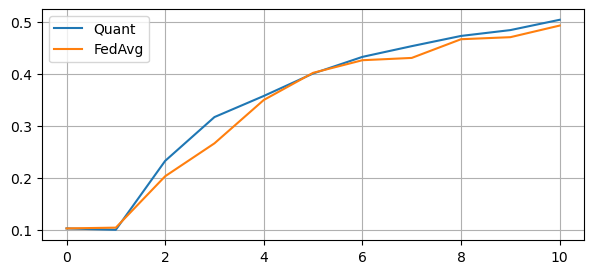

In [94]:
#clients = 40
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')

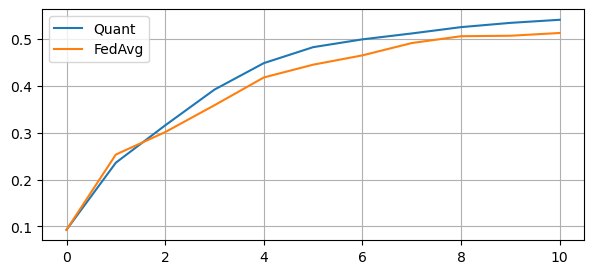

In [91]:
#clients = 20
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')

# The following is with fixed nmax and nmin

313/313 [==============================] - 2s 5ms/step - loss: 2.3189 - accuracy: 0.0961
Initial Test Loss: 2.3170
Initial Test Accuracy: 0.0953
Global Iteration 1/10
Client 1/5


C:\Users\afmb\AppData\Local\Temp\ipykernel_17832\1218228843.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights)
C:\Users\afmb\AppData\Local\Temp\ipykernel_17832\1218228843.py:222: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))


max: 0.6690930128097534 ----min: -0.5589783191680908
max error: 0.013896831776946783
max_model: 0.023346126079559326 min_model: -0.02779366448521614
Client 2/5
max: 0.6409972310066223 ----min: -0.4576084315776825
max error: 0.012270807288587093
max_model: 0.01749682053923607 min_model: -0.024541616439819336
Client 3/5
max: 0.665570080280304 ----min: -0.468327134847641
max error: 0.011020261328667402
max_model: 0.016133872792124748 min_model: -0.02204052358865738
Client 4/5
max: 0.6115993857383728 ----min: -0.43138816952705383
max error: 0.01368869747966528
max_model: 0.024104133248329163 min_model: -0.027377396821975708
Client 5/5
max: 0.6766459345817566 ----min: -0.3908945322036743
max error: 0.011996904853731394
max_model: 0.018047941848635674 min_model: -0.023993810638785362
nmax: 10000
------------------------------------------------------------------------------------------------------
percentage %: 4.325165978244415
313/313 [==============================] - 2s 6ms/step - loss: 2

313/313 [==============================] - 2s 6ms/step - loss: 1.1991 - accuracy: 0.5723
Global Test loss: 1.1991, Global Test accuracy: 0.5723
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 6ms/step - loss: 1.2282 - accuracy: 0.5703
_FedAvg Global Test loss: 1.2282, _FedAvg Global Test accuracy: 0.5703
------------------------------------------------------------------------------------------------------
Global Iteration 7/10
Client 1/5
max: 0.17012426257133484 ----min: -0.19681918621063232
max error: 0.020147944800555706
max_model: 0.04029589146375656 min_model: -0.03680867701768875
Client 2/5
max: 0.17897139489650726 ----min: -0.19016742706298828
max error: 0.019961732672527432
max_model: 0.03992346674203873 min_model: -0.03742923587560654
Client 3/5
max: 0.19369018077850342 ----min: -0.20452898740768433
max error: 0.01973051391541958
max_model: 0.039461031556129456 min_model: -0.0367

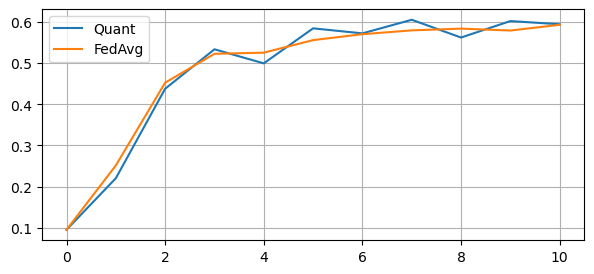

In [20]:
# Define neural network architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model
# Define the number of clients and local epochs
num_clients= 5
#local_epochs = 1
local_epochs0 = 2#local_epochs
local_epochs = 2
epoch_increase = 0
bits = 16

# Federated Averaging algorithm
num_global_iterations = 10
k_0 = -100 #num_global_iterations +1

#learning_rate = 1e-3
#optimizer = SGD(learning_rate=learning_rate)
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1)

#optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4) #


# Split the data into non-overlapping portions for each client
client_data = []
samples_per_client = len(x_train) // num_clients
for i in range(num_clients):
    start = i * samples_per_client
    end = (i + 1) * samples_per_client
    x_client = x_train[start:end]
    y_client = y_train[start:end]
    client_data.append((x_client, y_client))

# Initialize the global model
global_model = create_model()


# Compile the global model
global_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#global_model_FedAvg = global_model 
global_model_FedAvg = create_model()
global_model_FedAvg.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
global_weights = global_model.get_weights()
B_q = np.zeros([8,num_global_iterations])

#------------- FedAvg benchmark----------------------


global_model_FedAvg.set_weights(global_weights)
global_acc_list = []
global_loss_list = []

global_acc_list_FedAvg = []
global_loss_list_FedAvg = []

#----------- Initial values:
initial_loss, initial_accuracy = global_model.evaluate(x_test, y_test)
print(f'Initial Test Loss: {initial_loss:.4f}')
print(f'Initial Test Accuracy: {initial_accuracy:.4f}')

global_acc_list_FedAvg.append(initial_accuracy)
global_acc_list.append(initial_accuracy)
#-----------------------------------------------------
for k in range(num_global_iterations):
    print(f"Global Iteration {k + 1}/{num_global_iterations}")

    # List to store client models for averaging
    client_models = []
    client_models_FedAvg = []

    for i in range(num_clients):
        print(f"Client {i + 1}/{num_clients}")
        x_local, y_local = client_data[i]

        # Create a copy of the global model for each client
        local_model = create_model()
        local_model.set_weights(global_weights)#global_model.get_weights())
        #----------------------- FedAvg benchmark--------------------------------
        local_model_FedAvg = create_model()
        local_model_FedAvg.set_weights(global_model_FedAvg.get_weights())
        local_model_FedAvg .compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        local_model_FedAvg .fit(x_local, y_local, epochs=local_epochs0, verbose=0)
        
            
        #----------------------------------------------------
        # Compile and train the local model
        local_model.compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        
        local_model.fit(x_local, y_local, epochs=local_epochs , verbose=0)

        if k<= k_0:
            local_model.set_weights(local_model_FedAvg.get_weights())
#--------------------------------------------------- Quantization -----------------------------------------
        if k>k_0:
        # Quantize the local model weights
        #quantized_weights = [np.round(w * 127) / 127 for w in local_model.get_weights()]
            diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights) 
            local_weight_shape_0 = diff_local_global_weight.shape[0]
            quantized_diff_local_global_weight = diff_local_global_weight
            err = np.zeros([local_weight_shape_0 ,1])
            b_p = np.zeros([local_weight_shape_0 ,1])
            b_q =  np.zeros([local_weight_shape_0 ,1])
            x_previous = np.zeros([local_weight_shape_0 ,1])
            x_all_original = np.zeros([local_weight_shape_0 ,1])
            p10 = 0
            x_all = 0
            x = np.zeros([local_weight_shape_0,1])
            Quantized_diff_local_global_weight = []
            for h in range(local_weight_shape_0):
                x_position = 0
                if h==0:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(27*32,)
                    #Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
               ## quantized_diff_local_global_weight[h], tau, err[h], r = Quantization_NNs(bits,R,diff_local_global_weight[h])
                if h==2:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(7200*64,)
                
                if h in (1, 3, 5):
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(quantized_diff_local_global_weight[h].shape[0],)
                
                #if h==6:
                   # quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,1)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10*64,)
                
               #### x_previous[h] = np.max(abs(quantized_diff_local_global_weight[h]))
                ####x_position = np.where(np.abs(quantized_diff_local_global_weight[h]) == 
                ####                      max(np.abs(quantized_diff_local_global_weight[h])))
                ####x_temp=quantized_diff_local_global_weight[h] 
                ####x_all_original[h] = x_temp[x_position[0][0]] 
                #print(x[b[0][0]])
            
            #print(x_previous.T)
            ####x_all = np.max(x_previous)
           #### x_position_all = np.where(np.abs(x_previous) == max(np.abs(x_previous)))
            ####x_all_original1 = x_all_original[x_position_all[0][0]]
           #### print('x_all_original1:', x_all_original1)
            
           #### #print(x_previous.T)
            ####x_all = np.max(x_previous)
            #print('x_all:', x_all)
            
            for h in range(local_weight_shape_0):
                Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
           
            
            Quantized_diff_local_global_weight_for_me = Quantized_diff_local_global_weight
            print('max:',np.max(Quantized_diff_local_global_weight), '----min:',np.min(Quantized_diff_local_global_weight))
           # print('min:',np.min(Quantized_diff_local_global_weight))
            nmax = 10000#min(2000*(2+k), 50000)
            nmin = nmax
           # print( 'min of absolute value:',np.min(np.abs(Quantized_diff_local_global_weight)))
            Quantized_diff_local_global_weight, max_model, min_model, err = adaptive_signQuant(Quantized_diff_local_global_weight, 
                                                                                                       Quantized_diff_local_global_weight.shape[0], nmax,nmin)
            
            
            
            Quantized_diff_local_global_weight1 = Quantized_diff_local_global_weight
           
            print('max error:', np.max(np.abs(err)))# - np.sum(Quantized_diff_local_global_weight1))
            #print('sum 1r:', np.sum(Quantized_diff_local_global_weight1))
            #print('max_model:', max_model)
            #print('min_model:', min_model)
            print('max_model:', max_model, 'min_model:', min_model)
            
            #------------------ Update the local model with quantized weights:-----------------------------
            dim_h = 0
            for h in range(local_weight_shape_0):
                if h==0:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[0:27*32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(3, 3, 3, 32)
                    dim_h += 27*32
                    
                    
                if h==1:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,)
                    dim_h += 32
                if h==2: 
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+7200*64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(7200, 64)
                    dim_h+= 7200*64
                if h==3:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,)
                    dim_h += 64
            
                #if h==6:
                 #   quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+640]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    dim_h += 640
              
                if h==5:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+10]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10,)
                    dim_h += 10
            
            
            local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))
        #else:
           # local_model.set_weights()
            
        # Add the trained and quantized local model to the list
        client_models.append(local_model)
        client_models_FedAvg.append(local_model_FedAvg)
        #B_q[:,k] += b_q
            
        #---------------------------FedAvg benchmark---------------------------------
    print('nmax:', nmax)
    global_weights_FedAvg = np.mean([model.get_weights() for model in client_models_FedAvg], axis=0)
    global_model_FedAvg.set_weights(global_weights_FedAvg)

#------------------------------------------------------------------------------------------------------------
    # Calculate the global model's new weights as the average of the client models
    if k <= k_0:
        global_model.set_weights(global_weights_FedAvg)
        global_weights = global_weights_FedAvg
    else:
        global_weights = np.mean([model.get_weights() for model in client_models], axis=0)
        global_model.set_weights(global_weights)
        local_epochs = min(12, local_epochs + epoch_increase)
        #local_epochs += epoch_increase
        #local_epochs0 = local_epochs
        #local_epochs = max(1, local_epochs)
    
    if k == k_0:
        local_epochs += epoch_increase
        local_epochs0 = local_epochs
   # B_q[:,k] = b_q
#----------------------------------------------------------------------------
    # Evaluate the global model on the test data
    print('------------------------------------------------------------------------------------------------------')
    print('percentage %:', 2*100*nmax/462410)
    loss, accuracy = global_model.evaluate(x_test, y_test)
    print(f"Global Test loss: {loss:.4f}, Global Test accuracy: {accuracy:.4f}")
    global_acc_list.append(accuracy)
    global_loss_list.append(loss)
# The final global model is stored in 'global_model'
#-------------------------------------Evaluate the FedAvg global model on the test data----------------------
    print('------------------------------ ------FedAvg Benchmark------------------------------------------------')
    loss_FedAvg, accuracy_FedAvg = global_model_FedAvg.evaluate(x_test, y_test)
    print(f"_FedAvg Global Test loss: {loss_FedAvg:.4f}, _FedAvg Global Test accuracy: {accuracy_FedAvg:.4f}")
    print('------------------------------------------------------------------------------------------------------')
    global_acc_list_FedAvg.append(accuracy_FedAvg)
    global_loss_list_FedAvg.append(loss_FedAvg)
    #----------------
   # plt.figure(figsize=(7, 3))
   # plt.plot(global_acc_list)    
   # plt.plot(global_acc_list_FedAvg)
   # plt.legend(['Quant', 'FedAvg'])
   # plt.grid(True, which='major')   
    
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    
            
            
            
            

In [23]:
import numpy as np

# Sample vector and lambda
x = np.array([10, -2, -0.5, -4, 5, -1])
lambda_val = 0.1

# Step 1: Calculate L1 norm of the vector
l1_norm = np.linalg.norm(x, ord=1)

# Step 2: Normalize each element of the vector by the L1 norm
normalized_x = np.abs(x) / l1_norm

# Step 3: Identify the indices where the normalized value is greater than or equal to lambda
indices = np.where(normalized_x >= lambda_val)[0]

# Step 4: Count the number of positive and negative elements among these indices
positive_elements = x[indices] > 0
negative_elements = x[indices] < 0

nmax = np.sum(positive_elements)
nmin = np.sum(negative_elements)

# Print results
print("Indices where abs(x[i])/L1_norm >= lambda:", indices)
print("Corresponding elements:", x[indices])
print("Number of positive elements (nmax):", nmax)
print("Number of negative elements (nmin):", nmin)


Indices where abs(x[i])/L1_norm >= lambda: [0 3 4]
Corresponding elements: [10. -4.  5.]
Number of positive elements (nmax): 2
Number of negative elements (nmin): 1


# nmax = nmin 

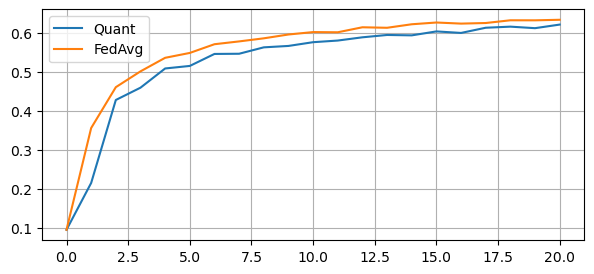

In [80]:
#min(2000*(2+k), 50000)
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major') 

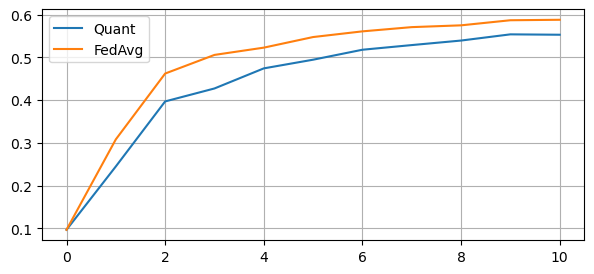

In [72]:
min(2000*(1+k), 50000)
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')  

# Now, with just one n_j: 

In [17]:
def adaptive_signQuant_new(main_vector, dim, n_j):
    eps = 1
    n_max = n_j# np.int64(min(n_j, np.floor(dim / 2)))
    
    x = main_vector
    x_q = np.zeros(dim)
    x_quant = np.zeros(dim)

    # Find the n_j largest absolute values and their indices
    sorted_indices_abs = np.argsort(np.abs(x))
    largest_abs_values_indices = sorted_indices_abs[-n_max:]
    largest_abs_values = x[largest_abs_values_indices]

    for i in range(n_max):
        x_q[largest_abs_values_indices[i]] = largest_abs_values[i]

    # Find the smallest absolute value among the n_j elements
    min_abs_value = np.min(np.abs(largest_abs_values))

    # Assign random values to the elements set to 0
    zero_indices = np.where(x_q == 0)[0]
    for zero_index in zero_indices:
        # If the original value is negative, assign a negative random value
        if x[zero_index] < 0:
            x_q[zero_index] = -np.random.uniform(0, min_abs_value)
        # If the original value is positive, assign a positive random value
        else:
            x_q[zero_index] = np.random.uniform(0, min_abs_value)

    err = main_vector - x_q

    # Return the results
    return x_q, largest_abs_values, err#, largest_abs_values_indices


313/313 [==============================] - 3s 9ms/step - loss: 2.3471 - accuracy: 0.1027
Initial Test Loss: 2.3523
Initial Test Accuracy: 0.1005
Global Iteration 1/40
Client 1/50


C:\Users\afmb\AppData\Local\Temp\ipykernel_5868\2281814886.py:116: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights)


max: 0.07234847545623779 ----min: -0.05772099643945694
max error: 0.009532443949112184
max_model: 0.00953255407512188
Client 2/50


C:\Users\afmb\AppData\Local\Temp\ipykernel_5868\2281814886.py:222: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))


max: 0.04896041750907898 ----min: -0.03400951623916626
max error: 0.011095335040297777
max_model: 0.01109536737203598
Client 3/50
max: 0.04601960629224777 ----min: -0.08617657423019409
max error: 0.009943585355002645
max_model: 0.00994377862662077
Client 4/50
max: 0.09210507571697235 ----min: -0.04336729645729065
max error: 0.010666407697779613
max_model: 0.010666700080037117
Client 5/50
max: 0.051532164216041565 ----min: -0.04244270920753479
max error: 0.007719166508630259
max_model: 0.0077191730961203575
Client 6/50
max: 0.07029084861278534 ----min: -0.050494998693466187
max error: 0.010075243719889708
max_model: 0.010075297206640244
Client 7/50
max: 0.060671549290418625 ----min: -0.04687562584877014
max error: 0.00884257389551914
max_model: 0.008842604234814644
Client 8/50
max: 0.054063305258750916 ----min: -0.06100589036941528
max error: 0.0067089565769854935
max_model: 0.006709029898047447
Client 9/50
max: 0.06945188343524933 ----min: -0.04237854480743408
max error: 0.011050883963

max: 0.0941186249256134 ----min: -0.05085776746273041
max error: 0.00908504815374585
max_model: 0.009085068479180336
Client 10/50
max: 0.06931549310684204 ----min: -0.04614274948835373
max error: 0.009787410512973422
max_model: 0.00978742353618145
Client 11/50
max: 0.0477917343378067 ----min: -0.06055639684200287
max error: 0.008523199946086215
max_model: 0.00852323230355978
Client 12/50
max: 0.054282329976558685 ----min: -0.06385448575019836
max error: 0.00893246369888511
max_model: 0.008932464756071568
Client 13/50
max: 0.05115970969200134 ----min: -0.047305889427661896
max error: 0.008370052320563313
max_model: 0.008370062336325645
Client 14/50
max: 0.04658595472574234 ----min: -0.05603393167257309
max error: 0.008891030822001484
max_model: 0.008891085162758827
Client 15/50
max: 0.051596611738204956 ----min: -0.08013001084327698
max error: 0.007730464595095473
max_model: 0.007730504497885704
Client 16/50
max: 0.054388418793678284 ----min: -0.05578896030783653
max error: 0.0079686387

max error: 0.012549270346218387
max_model: 0.012555025517940521
Client 17/50
max: 0.04443420097231865 ----min: -0.06857118755578995
max error: 0.01338383203740329
max_model: 0.013384191319346428
Client 18/50
max: 0.03744799643754959 ----min: -0.06675562262535095
max error: 0.013095245089532928
max_model: 0.013096115551888943
Client 19/50
max: 0.04272940009832382 ----min: -0.07266614586114883
max error: 0.012918290926401213
max_model: 0.0129208043217659
Client 20/50
max: 0.04049133509397507 ----min: -0.051739029586315155
max error: 0.013032820130983655
max_model: 0.013033160008490086
Client 21/50
max: 0.03963081166148186 ----min: -0.04650329053401947
max error: 0.012695791727166863
max_model: 0.01269580889493227
Client 22/50
max: 0.03783823549747467 ----min: -0.04832545667886734
max error: 0.012694899508220989
max_model: 0.012695427983999252
Client 23/50
max: 0.044804807752370834 ----min: -0.061957597732543945
max error: 0.012599775255246587
max_model: 0.012603633105754852
Client 24/50


max error: 0.01125347855604697
max_model: 0.011254772543907166
Client 24/50
max: 0.034237753599882126 ----min: -0.06670960783958435
max error: 0.01136950866714557
max_model: 0.011370265856385231
Client 25/50
max: 0.03530377894639969 ----min: -0.03197556734085083
max error: 0.011117527794840435
max_model: 0.011118484660983086
Client 26/50
max: 0.04341403394937515 ----min: -0.03684210404753685
max error: 0.011480732128321982
max_model: 0.01148214377462864
Client 27/50
max: 0.03458741679787636 ----min: -0.052643537521362305
max error: 0.01161188911101809
max_model: 0.011612266302108765
Client 28/50
max: 0.03493160754442215 ----min: -0.05028678476810455
max error: 0.011677879952593607
max_model: 0.011678238399326801
Client 29/50
max: 0.03539520129561424 ----min: -0.03602632135152817
max error: 0.011545180645453061
max_model: 0.011545669287443161
Client 30/50
max: 0.0335598886013031 ----min: -0.03802013397216797
max error: 0.011680563179207678
max_model: 0.011680647730827332
Client 31/50
ma

max error: 0.010697183048619016
max_model: 0.01069738157093525
Client 31/50
max: 0.03585538640618324 ----min: -0.037753958255052567
max error: 0.010544602377215816
max_model: 0.010546693578362465
Client 32/50
max: 0.03768786042928696 ----min: -0.032684165984392166
max error: 0.011048264353802803
max_model: 0.011050472036004066
Client 33/50
max: 0.03227531537413597 ----min: -0.03095307946205139
max error: 0.010899228964634456
max_model: 0.01090254820883274
Client 34/50
max: 0.034548088908195496 ----min: -0.030105046927928925
max error: 0.010648169920258363
max_model: 0.010648643597960472
Client 35/50
max: 0.038596462458372116 ----min: -0.04306569695472717
max error: 0.010813768341089283
max_model: 0.010815059766173363
Client 36/50
max: 0.034780897200107574 ----min: -0.03936871886253357
max error: 0.010623432582140217
max_model: 0.01062343455851078
Client 37/50
max: 0.04561898112297058 ----min: -0.03438173234462738
max error: 0.010679499406766371
max_model: 0.010682063177227974
Client 38

max error: 0.010214289688883025
max_model: 0.010216914117336273
Client 38/50
max: 0.03500412032008171 ----min: -0.0321822389960289
max error: 0.010486730637485607
max_model: 0.010490217246115208
Client 39/50
max: 0.032705873250961304 ----min: -0.03343117982149124
max error: 0.010176102478749043
max_model: 0.010176531970500946
Client 40/50
max: 0.033319469541311264 ----min: -0.05184296518564224
max error: 0.010192203319905419
max_model: 0.01019403524696827
Client 41/50
max: 0.03366294130682945 ----min: -0.03257502615451813
max error: 0.01058259036548941
max_model: 0.010585343465209007
Client 42/50
max: 0.03240736573934555 ----min: -0.04245699942111969
max error: 0.01045486615362967
max_model: 0.010454921051859856
Client 43/50
max: 0.03262250870466232 ----min: -0.03226684778928757
max error: 0.010084036447333829
max_model: 0.010093753226101398
Client 44/50
max: 0.031711556017398834 ----min: -0.03312288597226143
max error: 0.010132431100397184
max_model: 0.010133182629942894
Client 45/50


max: 0.03485475853085518 ----min: -0.03863399848341942
max error: 0.009940436073159146
max_model: 0.00994310062378645
Client 46/50
max: 0.03214903920888901 ----min: -0.03803476691246033
max error: 0.009875804636626
max_model: 0.009879563003778458
Client 47/50
max: 0.03269978612661362 ----min: -0.0465584397315979
max error: 0.009991341570650396
max_model: 0.00999382883310318
Client 48/50
max: 0.036437757313251495 ----min: -0.03362977132201195
max error: 0.009979690671965705
max_model: 0.009987914934754372
Client 49/50
max: 0.029980093240737915 ----min: -0.030242353677749634
max error: 0.01004082856590745
max_model: 0.010045992210507393
Client 50/50
max: 0.0308525450527668 ----min: -0.03622114658355713
max error: 0.009893137931049683
max_model: 0.00989325437694788
n_j: 32000
------------------------------------------------------------------------------------------------------
percentage %: 6.920265565191064
313/313 [==============================] - 3s 9ms/step - loss: 1.3886 - accuracy:

313/313 [==============================] - 2s 8ms/step - loss: 1.3574 - accuracy: 0.5272
Global Test loss: 1.3574, Global Test accuracy: 0.5272
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 2s 7ms/step - loss: 1.3641 - accuracy: 0.5225
_FedAvg Global Test loss: 1.3641, _FedAvg Global Test accuracy: 0.5225
------------------------------------------------------------------------------------------------------
Global Iteration 9/40
Client 1/50
max: 0.037106387317180634 ----min: -0.03273160755634308
max error: 0.00949176925980859
max_model: 0.009495265781879425
Client 2/50
max: 0.03610137850046158 ----min: -0.032517943531274796
max error: 0.009238342799123311
max_model: 0.009240955114364624
Client 3/50
max: 0.032005853950977325 ----min: -0.037158504128456116
max error: 0.009567960180024725
max_model: 0.009574804455041885
Client 4/50
max: 0.03128727152943611 ----min: -0.03656783699989319
max er

max: 0.03257133811712265 ----min: -0.028769589960575104
max error: 0.009004517523699738
max_model: 0.009016327559947968
Client 5/50
max: 0.03683746978640556 ----min: -0.03137274831533432
max error: 0.00911058532101912
max_model: 0.009118370711803436
Client 6/50
max: 0.035298340022563934 ----min: -0.03557729721069336
max error: 0.009151730209197075
max_model: 0.009163075126707554
Client 7/50
max: 0.03311362862586975 ----min: -0.05750533938407898
max error: 0.008714798734158032
max_model: 0.008718594908714294
Client 8/50
max: 0.034878700971603394 ----min: -0.043111637234687805
max error: 0.009393493183565235
max_model: 0.009406655095517635
Client 9/50
max: 0.0347980335354805 ----min: -0.03939595818519592
max error: 0.009066562450965066
max_model: 0.00907309353351593
Client 10/50
max: 0.032754991203546524 ----min: -0.03544101119041443
max error: 0.00910103857708997
max_model: 0.009108204394578934
Client 11/50
max: 0.03689942881464958 ----min: -0.03469431400299072
max error: 0.008906369084

max error: 0.009052699516846762
max_model: 0.00906219519674778
Client 12/50
max: 0.034712053835392 ----min: -0.0373806357383728
max error: 0.008953074323677734
max_model: 0.008968204259872437
Client 13/50
max: 0.0334053635597229 ----min: -0.03324468806385994
max error: 0.009139979528998908
max_model: 0.009153170511126518
Client 14/50
max: 0.02980625256896019 ----min: -0.03621702268719673
max error: 0.008962741880465032
max_model: 0.00896782148629427
Client 15/50
max: 0.03230162709951401 ----min: -0.043287962675094604
max error: 0.008993067347220047
max_model: 0.008993234485387802
Client 16/50
max: 0.0390801802277565 ----min: -0.038428351283073425
max error: 0.009024413536190991
max_model: 0.009042935445904732
Client 17/50
max: 0.03189755603671074 ----min: -0.03231755644083023
max error: 0.008824142201117801
max_model: 0.008828379213809967
Client 18/50
max: 0.03257415443658829 ----min: -0.03356455639004707
max error: 0.009085687099635512
max_model: 0.009102409705519676
Client 19/50
max:

max error: 0.008975962420686136
max_model: 0.00898014660924673
Client 19/50
max: 0.0317046195268631 ----min: -0.031248051673173904
max error: 0.008817083173915058
max_model: 0.00882363598793745
Client 20/50
max: 0.03359094262123108 ----min: -0.03321938216686249
max error: 0.009095535349733794
max_model: 0.0091162770986557
Client 21/50
max: 0.04007953032851219 ----min: -0.034426458179950714
max error: 0.008885507962717658
max_model: 0.008899033069610596
Client 22/50
max: 0.03416739031672478 ----min: -0.038002774119377136
max error: 0.008722788382503635
max_model: 0.008742214180529118
Client 23/50
max: 0.03783547133207321 ----min: -0.03512072563171387
max error: 0.008932334470164744
max_model: 0.008935118094086647
Client 24/50
max: 0.03518460690975189 ----min: -0.03513282909989357
max error: 0.008643780512930833
max_model: 0.008656186982989311
Client 25/50
max: 0.036035917699337006 ----min: -0.044492658227682114
max error: 0.008773091515611092
max_model: 0.008787941187620163
Client 26/50

max error: 0.00878402608323124
max_model: 0.008790773339569569
Client 26/50
max: 0.03154817968606949 ----min: -0.04573151096701622
max error: 0.008979827859987246
max_model: 0.008987382054328918
Client 27/50
max: 0.03984687104821205 ----min: -0.0384177640080452
max error: 0.009127455152290595
max_model: 0.009137935936450958
Client 28/50
max: 0.04006053879857063 ----min: -0.03175842761993408
max error: 0.00903378791164283
max_model: 0.009042826481163502
Client 29/50
max: 0.032587576657533646 ----min: -0.038515299558639526
max error: 0.008939034356170604
max_model: 0.008946157060563564
Client 30/50
max: 0.03716835379600525 ----min: -0.035581883043050766
max error: 0.008792179341745537
max_model: 0.00881209783256054
Client 31/50
max: 0.040684208273887634 ----min: -0.03446085378527641
max error: 0.008613196222962947
max_model: 0.008629422634840012
Client 32/50
max: 0.03428828716278076 ----min: -0.03700801730155945
max error: 0.008814778620469064
max_model: 0.00882343202829361
Client 33/50


max error: 0.00909654195096582
max_model: 0.009114391170442104
Client 33/50
max: 0.03228355199098587 ----min: -0.034515395760536194
max error: 0.009077706698355083
max_model: 0.009092971682548523
Client 34/50
max: 0.03938131406903267 ----min: -0.03145614266395569
max error: 0.009125545829738832
max_model: 0.009142719209194183
Client 35/50
max: 0.0318366177380085 ----min: -0.03906551003456116
max error: 0.008536434400721828
max_model: 0.008552229031920433
Client 36/50
max: 0.033100761473178864 ----min: -0.03377756476402283
max error: 0.009072385789205243
max_model: 0.009077299386262894
Client 37/50
max: 0.03867855668067932 ----min: -0.037632524967193604
max error: 0.009010504185517717
max_model: 0.00901869498193264
Client 38/50
max: 0.03689805790781975 ----min: -0.040797680616378784
max error: 0.009063268776983538
max_model: 0.009071296080946922
Client 39/50
max: 0.031719859689474106 ----min: -0.03861987590789795
max error: 0.008930048821119857
max_model: 0.008937541395425797
Client 40/

max error: 0.009111539964084531
max_model: 0.009134032763540745
Client 40/50
max: 0.03235260024666786 ----min: -0.03756198287010193
max error: 0.008929625848854365
max_model: 0.008941193111240864
Client 41/50
max: 0.0345044769346714 ----min: -0.03937714546918869
max error: 0.009035682961514864
max_model: 0.009056301787495613
Client 42/50
max: 0.03240073099732399 ----min: -0.041625216603279114
max error: 0.009062739829308985
max_model: 0.009080950170755386
Client 43/50
max: 0.03523629158735275 ----min: -0.032224833965301514
max error: 0.009060757159015366
max_model: 0.009071163833141327
Client 44/50
max: 0.03457754850387573 ----min: -0.033811312168836594
max error: 0.009194003625311652
max_model: 0.009203328751027584
Client 45/50
max: 0.03410501033067703 ----min: -0.03426787629723549
max error: 0.008931203372931028
max_model: 0.008946258574724197
Client 46/50
max: 0.03123825043439865 ----min: -0.039345189929008484
max error: 0.008815608816441686
max_model: 0.008826550096273422
Client 47

max error: 0.009047509559026999
max_model: 0.00906648300588131
Client 47/50
max: 0.03226057440042496 ----min: -0.028516553342342377
max error: 0.008822053093956079
max_model: 0.008840270340442657
Client 48/50
max: 0.028346236795186996 ----min: -0.036145128309726715
max error: 0.00872238195614961
max_model: 0.008725514635443687
Client 49/50
max: 0.03248262405395508 ----min: -0.054296642541885376
max error: 0.00909659355057478
max_model: 0.009102931246161461
Client 50/50
max: 0.031682953238487244 ----min: -0.03496555611491203
max error: 0.00905777041756041
max_model: 0.009076184593141079
n_j: 50000
------------------------------------------------------------------------------------------------------
percentage %: 10.812914945611038
313/313 [==============================] - 3s 8ms/step - loss: 1.2061 - accuracy: 0.5806
Global Test loss: 1.2061, Global Test accuracy: 0.5806
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [=====

313/313 [==============================] - 3s 9ms/step - loss: 1.2077 - accuracy: 0.5796
_FedAvg Global Test loss: 1.2077, _FedAvg Global Test accuracy: 0.5796
------------------------------------------------------------------------------------------------------
Global Iteration 18/40
Client 1/50
max: 0.030867252498865128 ----min: -0.034062325954437256
max error: 0.009108102328828216
max_model: 0.009124074131250381
Client 2/50
max: 0.03826151043176651 ----min: -0.03516899794340134
max error: 0.00905855259120438
max_model: 0.009069547988474369
Client 3/50
max: 0.03221236169338226 ----min: -0.031991198658943176
max error: 0.009073038674969752
max_model: 0.009112324565649033
Client 4/50
max: 0.03459887206554413 ----min: -0.03162972256541252
max error: 0.009109300863793955
max_model: 0.009119754657149315
Client 5/50
max: 0.03342388570308685 ----min: -0.04426190257072449
max error: 0.00902900389927955
max_model: 0.009041590616106987
Client 6/50
max: 0.030754048377275467 ----min: -0.03182855

max: 0.03276434913277626 ----min: -0.03421652317047119
max error: 0.008849892916295364
max_model: 0.008860395289957523
Client 7/50
max: 0.033752843737602234 ----min: -0.03596183657646179
max error: 0.008733674762629774
max_model: 0.00876329094171524
Client 8/50
max: 0.033570196479558945 ----min: -0.03074401617050171
max error: 0.009136219904845748
max_model: 0.00915617123246193
Client 9/50
max: 0.037991657853126526 ----min: -0.03200423717498779
max error: 0.008625477898111305
max_model: 0.00862572155892849
Client 10/50
max: 0.03685557097196579 ----min: -0.03160950541496277
max error: 0.008919047522622759
max_model: 0.008924243971705437
Client 11/50
max: 0.03508319705724716 ----min: -0.03759884834289551
max error: 0.009121068779319718
max_model: 0.009129514917731285
Client 12/50
max: 0.03489041328430176 ----min: -0.031091956421732903
max error: 0.00901926743609878
max_model: 0.009038262069225311
Client 13/50
max: 0.0366193987429142 ----min: -0.03804995119571686
max error: 0.009228954032

max error: 0.009138769948465016
max_model: 0.009151872247457504
Client 14/50
max: 0.039418525993824005 ----min: -0.0351586751639843
max error: 0.008994601968544347
max_model: 0.009001980535686016
Client 15/50
max: 0.035867493599653244 ----min: -0.04327899217605591
max error: 0.008940023306543322
max_model: 0.008956536650657654
Client 16/50
max: 0.04508725553750992 ----min: -0.04120868444442749
max error: 0.009394688023092197
max_model: 0.009402381256222725
Client 17/50
max: 0.03466852009296417 ----min: -0.04384392499923706
max error: 0.009048644416805049
max_model: 0.009060141630470753
Client 18/50
max: 0.03416800498962402 ----min: -0.033451199531555176
max error: 0.008938456198813352
max_model: 0.008942373096942902
Client 19/50
max: 0.03603319823741913 ----min: -0.031528621912002563
max error: 0.008830822494914197
max_model: 0.008844032883644104
Client 20/50
max: 0.03241777792572975 ----min: -0.030356742441654205
max error: 0.009077500501669503
max_model: 0.009084690362215042
Client 2

max error: 0.009185091291548883
max_model: 0.009195639751851559
Client 21/50
max: 0.04097812622785568 ----min: -0.04815065860748291
max error: 0.009202145728065393
max_model: 0.009206032380461693
Client 22/50
max: 0.034445058554410934 ----min: -0.0405735969543457
max error: 0.009017005081594
max_model: 0.00902777910232544
Client 23/50
max: 0.03261616453528404 ----min: -0.044446155428886414
max error: 0.008963451664488588
max_model: 0.008986152708530426
Client 24/50
max: 0.03866242617368698 ----min: -0.03950321674346924
max error: 0.008994063439330914
max_model: 0.009006774984300137
Client 25/50
max: 0.03693738952279091 ----min: -0.038522087037563324
max error: 0.009159960352214789
max_model: 0.009168274700641632
Client 26/50
max: 0.03466289862990379 ----min: -0.03238953649997711
max error: 0.009069472621416394
max_model: 0.009071004576981068
Client 27/50
max: 0.038008589297533035 ----min: -0.03852834552526474
max error: 0.009301572599833864
max_model: 0.009309656918048859
Client 28/50


max: 0.034813858568668365 ----min: -0.03708353638648987
max error: 0.009144162237207942
max_model: 0.009160447865724564
Client 29/50
max: 0.03514334186911583 ----min: -0.03543272614479065
max error: 0.009356775525585757
max_model: 0.009377287700772285
Client 30/50
max: 0.03461214900016785 ----min: -0.03710752725601196
max error: 0.00909678597448808
max_model: 0.00911631342023611
Client 31/50
max: 0.0457037128508091 ----min: -0.034505896270275116
max error: 0.009193901674083581
max_model: 0.009213849902153015
Client 32/50
max: 0.031887248158454895 ----min: -0.03616452217102051
max error: 0.008998551186462546
max_model: 0.009007194079458714
Client 33/50
max: 0.0367610827088356 ----min: -0.03722161427140236
max error: 0.009253599850463095
max_model: 0.00926542654633522
Client 34/50
max: 0.03403555229306221 ----min: -0.035965971648693085
max error: 0.00911956466324542
max_model: 0.009124272502958775
Client 35/50
max: 0.03542717546224594 ----min: -0.04366543889045715
max error: 0.0090780546

max error: 0.009308753395499981
max_model: 0.009321141988039017
Client 36/50
max: 0.034845128655433655 ----min: -0.030988216400146484
max error: 0.00910972090607313
max_model: 0.009120402857661247
Client 37/50
max: 0.036259181797504425 ----min: -0.03191240876913071
max error: 0.009156504710621249
max_model: 0.009165318682789803
Client 38/50
max: 0.03476155921816826 ----min: -0.03592045232653618
max error: 0.009199015152673556
max_model: 0.009214023128151894
Client 39/50
max: 0.03494616225361824 ----min: -0.029158037155866623
max error: 0.008994310374766305
max_model: 0.0090024434030056
Client 40/50
max: 0.03361928090453148 ----min: -0.03309556841850281
max error: 0.009271397674865914
max_model: 0.009287298657000065
Client 41/50
max: 0.03524283319711685 ----min: -0.03743010759353638
max error: 0.009308139904767568
max_model: 0.009313592687249184
Client 42/50
max: 0.03205808997154236 ----min: -0.04780612885951996
max error: 0.009187412561800097
max_model: 0.009213799610733986
Client 43/5

max error: 0.009069958018738583
max_model: 0.009082619100809097
Client 43/50
max: 0.030469000339508057 ----min: -0.0321817472577095
max error: 0.009153349030502408
max_model: 0.009175866842269897
Client 44/50
max: 0.03540019318461418 ----min: -0.036141037940979004
max error: 0.009267034570529038
max_model: 0.00927853025496006
Client 45/50
max: 0.0344131737947464 ----min: -0.034652888774871826
max error: 0.009132057314176533
max_model: 0.00914200209081173
Client 46/50
max: 0.03284419700503349 ----min: -0.03836378455162048
max error: 0.00934991900642602
max_model: 0.009358085691928864
Client 47/50
max: 0.04021024703979492 ----min: -0.03604103624820709
max error: 0.009225238949126241
max_model: 0.009246282279491425
Client 48/50
max: 0.03397084027528763 ----min: -0.03597520291805267
max error: 0.008968273689709653
max_model: 0.008978589437901974
Client 49/50
max: 0.03217161446809769 ----min: -0.03226694464683533
max error: 0.009363017438600078
max_model: 0.009365510195493698
Client 50/50
m

max error: 0.009273522071542537
max_model: 0.009281584993004799
Client 50/50
max: 0.036955252289772034 ----min: -0.02965424582362175
max error: 0.009275389756135812
max_model: 0.009285993874073029
n_j: 50000
------------------------------------------------------------------------------------------------------
percentage %: 10.812914945611038
313/313 [==============================] - 6s 18ms/step - loss: 1.1517 - accuracy: 0.6027
Global Test loss: 1.1517, Global Test accuracy: 0.6027
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 4s 11ms/step - loss: 1.1301 - accuracy: 0.6079
_FedAvg Global Test loss: 1.1301, _FedAvg Global Test accuracy: 0.6079
------------------------------------------------------------------------------------------------------
Global Iteration 26/40
Client 1/50
max: 0.03102956712245941 ----min: -0.043991684913635254
max error: 0.009253483560131164
max_model: 0.009261673

max error: 0.008952089663826575
max_model: 0.008962645195424557
Client 2/50
max: 0.03142310306429863 ----min: -0.033884041011333466
max error: 0.009206395010503963
max_model: 0.009217627346515656
Client 3/50
max: 0.03184795007109642 ----min: -0.04232916235923767
max error: 0.009177511151501127
max_model: 0.00918520987033844
Client 4/50
max: 0.03481621295213699 ----min: -0.03391155228018761
max error: 0.008870605780824868
max_model: 0.008881999179720879
Client 5/50
max: 0.0334555022418499 ----min: -0.048279404640197754
max error: 0.009271625663510624
max_model: 0.009280248545110226
Client 6/50
max: 0.03403100743889809 ----min: -0.04248872399330139
max error: 0.008888224073995667
max_model: 0.008897850289940834
Client 7/50
max: 0.031818535178899765 ----min: -0.042040497064590454
max error: 0.009241994216765324
max_model: 0.009260048158466816
Client 8/50
max: 0.03496590629220009 ----min: -0.03034624457359314
max error: 0.009237681961717693
max_model: 0.009263645857572556
Client 9/50
max: 

max: 0.03381432592868805 ----min: -0.03281628340482712
max error: 0.008865321156686635
max_model: 0.008884958922863007
Client 10/50
max: 0.037741947919130325 ----min: -0.0338919460773468
max error: 0.008987057113878736
max_model: 0.009003490209579468
Client 11/50
max: 0.041288476437330246 ----min: -0.03732866048812866
max error: 0.009242299991350091
max_model: 0.009270571172237396
Client 12/50
max: 0.033364973962306976 ----min: -0.036717385053634644
max error: 0.009280587459817663
max_model: 0.009285293519496918
Client 13/50
max: 0.032881323248147964 ----min: -0.03330973535776138
max error: 0.009415534123559994
max_model: 0.009436734020709991
Client 14/50
max: 0.03273320943117142 ----min: -0.03147609904408455
max error: 0.009159397327531847
max_model: 0.009173518046736717
Client 15/50
max: 0.03451383113861084 ----min: -0.03547185659408569
max error: 0.009172026793721645
max_model: 0.00918726809322834
Client 16/50
max: 0.036135364323854446 ----min: -0.03626478835940361
max error: 0.0093

max: 0.034253038465976715 ----min: -0.03409522399306297
max error: 0.009174205331305665
max_model: 0.0091842170804739
Client 17/50
max: 0.036468230187892914 ----min: -0.0322866328060627
max error: 0.00929525337880847
max_model: 0.009319111704826355
Client 18/50
max: 0.0408765934407711 ----min: -0.03161030262708664
max error: 0.009294343943853063
max_model: 0.009298887103796005
Client 19/50
max: 0.03646130859851837 ----min: -0.035208653658628464
max error: 0.009155892486000725
max_model: 0.00917438417673111
Client 20/50
max: 0.03961298614740372 ----min: -0.032463181763887405
max error: 0.009359045488293069
max_model: 0.009376861155033112
Client 21/50
max: 0.03886064514517784 ----min: -0.0383465439081192
max error: 0.009168015842208208
max_model: 0.009178229607641697
Client 22/50
max: 0.03462384268641472 ----min: -0.04436010122299194
max error: 0.009077591134381443
max_model: 0.009098761714994907
Client 23/50
max: 0.03683198243379593 ----min: -0.036696504801511765
max error: 0.0089488637

max: 0.03404797241091728 ----min: -0.04110066592693329
max error: 0.009100135446702207
max_model: 0.009118431247770786
Client 24/50
max: 0.0324876643717289 ----min: -0.03830939531326294
max error: 0.009003004602501339
max_model: 0.009020816534757614
Client 25/50
max: 0.03671715408563614 ----min: -0.03682732582092285
max error: 0.00920900164616157
max_model: 0.009215534664690495
Client 26/50
max: 0.035284485667943954 ----min: -0.030929872766137123
max error: 0.009099125332062223
max_model: 0.009114944376051426
Client 27/50
max: 0.033060334622859955 ----min: -0.030848778784275055
max error: 0.008908149743074883
max_model: 0.008917737752199173
Client 28/50
max: 0.03473843261599541 ----min: -0.04042768478393555
max error: 0.009409092171642767
max_model: 0.009425360709428787
Client 29/50
max: 0.03795533999800682 ----min: -0.033142998814582825
max error: 0.009156324988598767
max_model: 0.009179305285215378
Client 30/50
max: 0.033461689949035645 ----min: -0.031546831130981445
max error: 0.009

max: 0.03483247756958008 ----min: -0.037309110164642334
max error: 0.009549588537698404
max_model: 0.009557709097862244
Client 31/50
max: 0.03488074243068695 ----min: -0.041295409202575684
max error: 0.00926238377999718
max_model: 0.009266331791877747
Client 32/50
max: 0.03266855701804161 ----min: -0.03681253641843796
max error: 0.008966902807493316
max_model: 0.008974283933639526
Client 33/50
max: 0.03966362774372101 ----min: -0.037413597106933594
max error: 0.009571170447404166
max_model: 0.009585203602910042
Client 34/50
max: 0.04007139801979065 ----min: -0.034034326672554016
max error: 0.009542830920245764
max_model: 0.009546905755996704
Client 35/50
max: 0.03486216068267822 ----min: -0.038067493587732315
max error: 0.009254181085129501
max_model: 0.00926782563328743
Client 36/50
max: 0.0361567847430706 ----min: -0.03522980213165283
max error: 0.009129341455099275
max_model: 0.00914682075381279
Client 37/50
max: 0.03551224619150162 ----min: -0.03593003749847412
max error: 0.0094539

max: 0.03426152467727661 ----min: -0.03198784589767456
max error: 0.009372595394683221
max_model: 0.009380053728818893
Client 38/50
max: 0.033433686941862106 ----min: -0.03870499134063721
max error: 0.009517879439498425
max_model: 0.009523913264274597
Client 39/50
max: 0.03653806075453758 ----min: -0.0389094240963459
max error: 0.009364565992293216
max_model: 0.00938587635755539
Client 40/50
max: 0.03471649810671806 ----min: -0.03721556067466736
max error: 0.009268758022927662
max_model: 0.009281419217586517
Client 41/50
max: 0.033734820783138275 ----min: -0.03131992369890213
max error: 0.009233110888212078
max_model: 0.0092344144359231
Client 42/50
max: 0.03851154074072838 ----min: -0.03583461046218872
max error: 0.009073471788796847
max_model: 0.009105215780436993
Client 43/50
max: 0.034160591661930084 ----min: -0.03348993882536888
max error: 0.00926269943390312
max_model: 0.009276110678911209
Client 44/50
max: 0.032512061297893524 ----min: -0.03528802841901779
max error: 0.009369337

max: 0.034124571830034256 ----min: -0.03450495004653931
max error: 0.009243094670407619
max_model: 0.009252503514289856
Client 45/50
max: 0.03174243122339249 ----min: -0.05059805512428284
max error: 0.009388686627996
max_model: 0.009409215301275253
Client 46/50
max: 0.0378236249089241 ----min: -0.04208881035447121
max error: 0.009606357867943444
max_model: 0.00961997825652361
Client 47/50
max: 0.043427202850580215 ----min: -0.03283759951591492
max error: 0.009087352273411457
max_model: 0.009087725542485714
Client 48/50
max: 0.0350843109190464 ----min: -0.032013703137636185
max error: 0.00899996018366939
max_model: 0.009009295143187046
Client 49/50
max: 0.03776445984840393 ----min: -0.036458104848861694
max error: 0.009212597240084166
max_model: 0.009229599498212337
Client 50/50
max: 0.03768828883767128 ----min: -0.03308404982089996
max error: 0.009077384198592095
max_model: 0.00908707082271576
n_j: 50000
----------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------
percentage %: 10.812914945611038
313/313 [==============================] - 4s 13ms/step - loss: 1.0937 - accuracy: 0.6254
Global Test loss: 1.0937, Global Test accuracy: 0.6254
------------------------------ ------FedAvg Benchmark------------------------------------------------
313/313 [==============================] - 6s 18ms/step - loss: 1.0874 - accuracy: 0.6284
_FedAvg Global Test loss: 1.0874, _FedAvg Global Test accuracy: 0.6284
------------------------------------------------------------------------------------------------------
Global Iteration 35/40
Client 1/50
max: 0.04393323138356209 ----min: -0.03065493330359459
max error: 0.00912653684334995
max_model: 0.00913764163851738
Client 2/50
max: 0.037363797426223755 ----min: -0.03125222027301788
max error: 0.009463342436087083
max_model: 0.009475193917751312
Client 3/50
max: 0.03268416225910187 ----min: -0.03658512234687805
ma

max: 0.036296721547842026 ----min: -0.05478551983833313
max error: 0.009049504721320564
max_model: 0.00906122475862503
Client 4/50
max: 0.035595379769802094 ----min: -0.03251222148537636
max error: 0.009091478759795955
max_model: 0.00911722145974636
Client 5/50
max: 0.038553155958652496 ----min: -0.03401089087128639
max error: 0.009178849088200011
max_model: 0.00918940082192421
Client 6/50
max: 0.03658289462327957 ----min: -0.04535624384880066
max error: 0.009182176904255887
max_model: 0.009190019220113754
Client 7/50
max: 0.033508218824863434 ----min: -0.042491793632507324
max error: 0.00902686484112353
max_model: 0.009052486158907413
Client 8/50
max: 0.03108619898557663 ----min: -0.051646649837493896
max error: 0.009295721472694736
max_model: 0.009300350211560726
Client 9/50
max: 0.03938872367143631 ----min: -0.05301254987716675
max error: 0.009029906260330593
max_model: 0.009045583195984364
Client 10/50
max: 0.03515257686376572 ----min: -0.033806025981903076
max error: 0.00917034744

max: 0.03406262397766113 ----min: -0.0365583673119545
max error: 0.009311844120463167
max_model: 0.009330322965979576
Client 11/50
max: 0.038864776492118835 ----min: -0.03788407891988754
max error: 0.009318372565942996
max_model: 0.00932164117693901
Client 12/50
max: 0.035579267889261246 ----min: -0.0683315098285675
max error: 0.009376399508447798
max_model: 0.009378740563988686
Client 13/50
max: 0.0349365770816803 ----min: -0.03183316811919212
max error: 0.009105533492261276
max_model: 0.009125718846917152
Client 14/50
max: 0.03597760945558548 ----min: -0.03766912221908569
max error: 0.009192009577079573
max_model: 0.009205483831465244
Client 15/50
max: 0.03798196464776993 ----min: -0.047304511070251465
max error: 0.009274996987894956
max_model: 0.009289678186178207
Client 16/50
max: 0.03482401371002197 ----min: -0.03134787082672119
max error: 0.009416745914605694
max_model: 0.009425729513168335
Client 17/50
max: 0.03207051753997803 ----min: -0.03506408631801605
max error: 0.009197446

max: 0.03594551980495453 ----min: -0.03279555216431618
max error: 0.00915611241342145
max_model: 0.009170143865048885
Client 18/50
max: 0.034747958183288574 ----min: -0.03928792476654053
max error: 0.009058183136523354
max_model: 0.009087339043617249
Client 19/50
max: 0.03441767767071724 ----min: -0.03296181559562683
max error: 0.009188972038180521
max_model: 0.009205766022205353
Client 20/50
max: 0.038371741771698 ----min: -0.033202849328517914
max error: 0.009367310214005624
max_model: 0.009380035102367401
Client 21/50
max: 0.03487474471330643 ----min: -0.03077068366110325
max error: 0.009292313529068317
max_model: 0.009302360936999321
Client 22/50
max: 0.0322599895298481 ----min: -0.043020665645599365
max error: 0.009280627262733796
max_model: 0.009294964373111725
Client 23/50
max: 0.036151837557554245 ----min: -0.033223435282707214
max error: 0.009453679094038827
max_model: 0.009466785937547684
Client 24/50
max: 0.04127173125743866 ----min: -0.04117634892463684
max error: 0.0088937

max: 0.03214850276708603 ----min: -0.030595898628234863
max error: 0.008926696114148215
max_model: 0.008942853659391403
Client 25/50
max: 0.0328616201877594 ----min: -0.03596705198287964
max error: 0.009362671009257646
max_model: 0.009376239031553268
Client 26/50
max: 0.03433610498905182 ----min: -0.06298264861106873
max error: 0.009190417789454937
max_model: 0.009205305948853493
Client 27/50
max: 0.03152977302670479 ----min: -0.03260248899459839
max error: 0.009001740375710863
max_model: 0.009007159620523453
Client 28/50
max: 0.03523772954940796 ----min: -0.033208541572093964
max error: 0.00938688582555611
max_model: 0.009410418570041656
Client 29/50
max: 0.038756050169467926 ----min: -0.03383493795990944
max error: 0.009135562759683169
max_model: 0.009144000709056854
Client 30/50
max: 0.03317407891154289 ----min: -0.03355559706687927
max error: 0.00918345723579891
max_model: 0.009194646961987019
Client 31/50
max: 0.0359366238117218 ----min: -0.033959828317165375
max error: 0.00919820

max: 0.03404436260461807 ----min: -0.039799898862838745
max error: 0.00946113328200901
max_model: 0.009473856538534164
Client 32/50
max: 0.03788146749138832 ----min: -0.037863172590732574
max error: 0.009300897132966564
max_model: 0.009312399663031101
Client 33/50
max: 0.03578415513038635 ----min: -0.03994361311197281
max error: 0.009371379019393543
max_model: 0.009393952786922455
Client 34/50
max: 0.038564618676900864 ----min: -0.03572499752044678
max error: 0.009157815570284406
max_model: 0.009170493111014366
Client 35/50
max: 0.03337507322430611 ----min: -0.02962096780538559
max error: 0.009134764341349867
max_model: 0.009151186794042587
Client 36/50
max: 0.03359489142894745 ----min: -0.03344011306762695
max error: 0.009220261109151223
max_model: 0.009238194674253464
Client 37/50
max: 0.0347638837993145 ----min: -0.03399538993835449
max error: 0.009370970637253062
max_model: 0.009386476129293442
Client 38/50
max: 0.03452800586819649 ----min: -0.03434756398200989
max error: 0.0094162

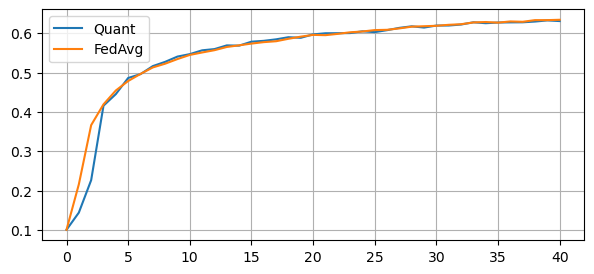

In [26]:
# Define neural network architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model
# Define the number of clients and local epochs
num_clients =50
#local_epochs = 1
local_epochs0 = 2#local_epochs
local_epochs = 2
epoch_increase = 0
bits = 16

# Federated Averaging algorithm
num_global_iterations = 40
k_0 = -100 #num_global_iterations +1

#learning_rate = 1e-3
#optimizer = SGD(learning_rate=learning_rate)
#optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1)

optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4) #


# Split the data into non-overlapping portions for each client
client_data = []
samples_per_client = len(x_train) // num_clients
for i in range(num_clients):
    start = i * samples_per_client
    end = (i + 1) * samples_per_client
    x_client = x_train[start:end]
    y_client = y_train[start:end]
    client_data.append((x_client, y_client))

# Initialize the global model
global_model = create_model()


# Compile the global model
global_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#global_model_FedAvg = global_model 
global_model_FedAvg = create_model()
global_model_FedAvg.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
global_weights = global_model.get_weights()
B_q = np.zeros([8,num_global_iterations])

#------------- FedAvg benchmark----------------------


global_model_FedAvg.set_weights(global_weights)
global_acc_list = []
global_loss_list = []

global_acc_list_FedAvg = []
global_loss_list_FedAvg = []

#----------- Initial values:
initial_loss, initial_accuracy = global_model.evaluate(x_test, y_test)
print(f'Initial Test Loss: {initial_loss:.4f}')
print(f'Initial Test Accuracy: {initial_accuracy:.4f}')

global_acc_list_FedAvg.append(initial_accuracy)
global_acc_list.append(initial_accuracy)
#-----------------------------------------------------
for k in range(num_global_iterations):
    print(f"Global Iteration {k + 1}/{num_global_iterations}")

    # List to store client models for averaging
    client_models = []
    client_models_FedAvg = []

    for i in range(num_clients):
        print(f"Client {i + 1}/{num_clients}")
        x_local, y_local = client_data[i]

        # Create a copy of the global model for each client
        local_model = create_model()
        local_model.set_weights(global_weights)#global_model.get_weights())
        #----------------------- FedAvg benchmark--------------------------------
        local_model_FedAvg = create_model()
        local_model_FedAvg.set_weights(global_model_FedAvg.get_weights())
        local_model_FedAvg .compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        local_model_FedAvg .fit(x_local, y_local, epochs=local_epochs0, verbose=0)
        
            
        #----------------------------------------------------
        # Compile and train the local model
        local_model.compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        
        local_model.fit(x_local, y_local, epochs=local_epochs , verbose=0)

        if k<= k_0:
            local_model.set_weights(local_model_FedAvg.get_weights())
#--------------------------------------------------- Quantization -----------------------------------------
        if k>k_0:
        # Quantize the local model weights
        #quantized_weights = [np.round(w * 127) / 127 for w in local_model.get_weights()]
            diff_local_global_weight = np.array(local_model.get_weights())-np.array(global_weights) 
            local_weight_shape_0 = diff_local_global_weight.shape[0]
            quantized_diff_local_global_weight = diff_local_global_weight
            err = np.zeros([local_weight_shape_0 ,1])
            b_p = np.zeros([local_weight_shape_0 ,1])
            b_q =  np.zeros([local_weight_shape_0 ,1])
            x_previous = np.zeros([local_weight_shape_0 ,1])
            x_all_original = np.zeros([local_weight_shape_0 ,1])
            p10 = 0
            x_all = 0
            x = np.zeros([local_weight_shape_0,1])
            Quantized_diff_local_global_weight = []
            for h in range(local_weight_shape_0):
                x_position = 0
                if h==0:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(27*32,)
                    #Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
               ## quantized_diff_local_global_weight[h], tau, err[h], r = Quantization_NNs(bits,R,diff_local_global_weight[h])
                if h==2:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(7200*64,)
                
                if h in (1, 3, 5):
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(quantized_diff_local_global_weight[h].shape[0],)
                
                #if h==6:
                   # quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,1)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10*64,)
                
               #### x_previous[h] = np.max(abs(quantized_diff_local_global_weight[h]))
                ####x_position = np.where(np.abs(quantized_diff_local_global_weight[h]) == 
                ####                      max(np.abs(quantized_diff_local_global_weight[h])))
                ####x_temp=quantized_diff_local_global_weight[h] 
                ####x_all_original[h] = x_temp[x_position[0][0]] 
                #print(x[b[0][0]])
            
            #print(x_previous.T)
            ####x_all = np.max(x_previous)
           #### x_position_all = np.where(np.abs(x_previous) == max(np.abs(x_previous)))
            ####x_all_original1 = x_all_original[x_position_all[0][0]]
           #### print('x_all_original1:', x_all_original1)
            
           #### #print(x_previous.T)
            ####x_all = np.max(x_previous)
            #print('x_all:', x_all)
            
            for h in range(local_weight_shape_0):
                Quantized_diff_local_global_weight = np.concatenate((Quantized_diff_local_global_weight,quantized_diff_local_global_weight[h]))
           
            
            Quantized_diff_local_global_weight_for_me = Quantized_diff_local_global_weight
            print('max:',np.max(Quantized_diff_local_global_weight), '----min:',np.min(Quantized_diff_local_global_weight))
           # print('min:',np.min(Quantized_diff_local_global_weight))
            n_j = min(4000*(2+k), 50000)
            #nmin = nmax
           # print( 'min of absolute value:',np.min(np.abs(Quantized_diff_local_global_weight)))
            Quantized_diff_local_global_weight, max_abs_model, err = adaptive_signQuant_new(Quantized_diff_local_global_weight, 
                                                                                                       Quantized_diff_local_global_weight.shape[0], n_j)
            
            
            
            Quantized_diff_local_global_weight1 = Quantized_diff_local_global_weight
           
            print('max error:', np.max(np.abs(err)))# - np.sum(Quantized_diff_local_global_weight1))
            #print('sum 1r:', np.sum(Quantized_diff_local_global_weight1))
            #print('max_model:', max_model)
            #print('min_model:', min_model)
            print('max_model:', np.min(np.abs(max_abs_model)))
            
            #------------------ Update the local model with quantized weights:-----------------------------
            dim_h = 0
            for h in range(local_weight_shape_0):
                if h==0:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[0:27*32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(3, 3, 3, 32)
                    dim_h += 27*32
                    
                    
                if h==1:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+32]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(32,)
                    dim_h += 32
                if h==2: 
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+7200*64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(7200, 64)
                    dim_h+= 7200*64
                if h==3:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+64]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,)
                    dim_h += 64
            
                #if h==6:
                 #   quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    
                if h==4:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+640]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(64,10)
                    dim_h += 640
              
                if h==5:
                    quantized_diff_local_global_weight[h] = Quantized_diff_local_global_weight[dim_h: dim_h+10]
                    quantized_diff_local_global_weight[h] = quantized_diff_local_global_weight[h].reshape(10,)
                    dim_h += 10
            
            
            local_model.set_weights(quantized_diff_local_global_weight + np.array(global_weights))
        #else:
           # local_model.set_weights()
            
        # Add the trained and quantized local model to the list
        client_models.append(local_model)
        client_models_FedAvg.append(local_model_FedAvg)
        #B_q[:,k] += b_q
            
        #---------------------------FedAvg benchmark---------------------------------
    print('n_j:', n_j)
    global_weights_FedAvg = np.mean([model.get_weights() for model in client_models_FedAvg], axis=0)
    global_model_FedAvg.set_weights(global_weights_FedAvg)

#------------------------------------------------------------------------------------------------------------
    # Calculate the global model's new weights as the average of the client models
    if k <= k_0:
        global_model.set_weights(global_weights_FedAvg)
        global_weights = global_weights_FedAvg
    else:
        global_weights = np.mean([model.get_weights() for model in client_models], axis=0)
        global_model.set_weights(global_weights)
        local_epochs = min(12, local_epochs + epoch_increase)
        #local_epochs += epoch_increase
        #local_epochs0 = local_epochs
        #local_epochs = max(1, local_epochs)
    
    if k == k_0:
        local_epochs += epoch_increase
        local_epochs0 = local_epochs
   # B_q[:,k] = b_q
#----------------------------------------------------------------------------
    # Evaluate the global model on the test data
    print('------------------------------------------------------------------------------------------------------')
    print('percentage %:', 100*n_j/462410)
    loss, accuracy = global_model.evaluate(x_test, y_test)
    print(f"Global Test loss: {loss:.4f}, Global Test accuracy: {accuracy:.4f}")
    global_acc_list.append(accuracy)
    global_loss_list.append(loss)
# The final global model is stored in 'global_model'
#-------------------------------------Evaluate the FedAvg global model on the test data----------------------
    print('------------------------------ ------FedAvg Benchmark------------------------------------------------')
    loss_FedAvg, accuracy_FedAvg = global_model_FedAvg.evaluate(x_test, y_test)
    print(f"_FedAvg Global Test loss: {loss_FedAvg:.4f}, _FedAvg Global Test accuracy: {accuracy_FedAvg:.4f}")
    print('------------------------------------------------------------------------------------------------------')
    global_acc_list_FedAvg.append(accuracy_FedAvg)
    global_loss_list_FedAvg.append(loss_FedAvg)
    #----------------
   # plt.figure(figsize=(7, 3))
   # plt.plot(global_acc_list)    
   # plt.plot(global_acc_list_FedAvg)
   # plt.legend(['Quant', 'FedAvg'])
   # plt.grid(True, which='major')   
    
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    
            
            
            
            

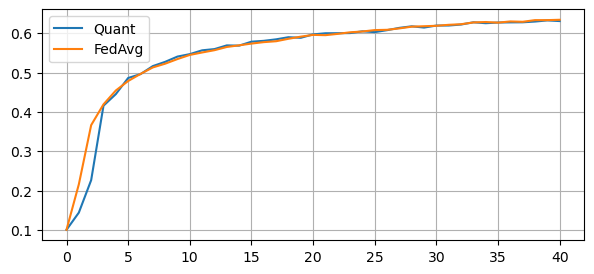

In [27]:
#M = 50
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    

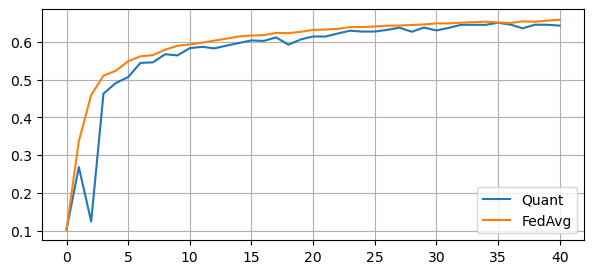

In [24]:
#M = 20
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    

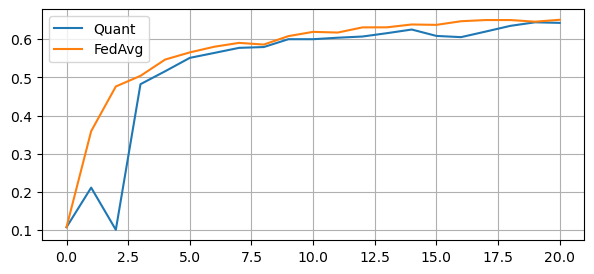

In [22]:
#M=20
plt.figure(figsize=(7, 3))
plt.plot(global_acc_list)    
plt.plot(global_acc_list_FedAvg)
plt.legend(['Quant', 'FedAvg'])
plt.grid(True, which='major')    
            

In [ ]:
#------FedAvg-------------------------------------
for k in range(num_global_iterations):
    print(f"Global Iteration {k + 1}/{num_global_iterations}")

    # List to store client models for averaging
    
    client_models_FedAvg = []

    for i in range(num_clients):
        print(f"Client {i + 1}/{num_clients}")
        x_local, y_local = client_data[i]

       
        #----------------------- FedAvg benchmark--------------------------------
        local_model_FedAvg = create_model()
        local_model_FedAvg.set_weights(global_model_FedAvg.get_weights())
        local_model_FedAvg .compile(optimizer=optimizer,
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
        local_model_FedAvg .fit(x_local, y_local, epochs=local_epochs0, verbose=0)
        
        FedAvg_test_vecor = np.array(local_model_FedAvg.get_weights())-np.array(global_model_FedAvg.get_weights())
        FedAvg_test_vecor_conc = []
        client_models_FedAvg.append(local_model_FedAvg)
        
        
        
    global_weights_FedAvg = np.mean([model0.get_weights() for model0 in client_models_FedAvg], axis=0)
    global_model_FedAvg.set_weights(global_weights_FedAvg)
    
    
    
loss_FedAvg, accuracy_FedAvg = global_model_FedAvg.evaluate(x_test, y_test)
print(f"_FedAvg Global Test loss: {loss_FedAvg:.4f}, _FedAvg Global Test accuracy: {accuracy_FedAvg:.4f}")
print('------------------------------------------------------------------------------------------------------')
global_acc_list_FedAvg.append(accuracy_FedAvg)
global_loss_list_FedAvg.append(loss_FedAvg)